In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
column_names = ['age', 'sex','cp','trestbps','chol','fbs','resteccg','thalach','exange','oldpeak','slope','ca','thall', 'num']
df = pd.read_csv('/content/drive/MyDrive/deneme1.data',header=None ,names=column_names ,na_values='?')

x=df.drop(['num' ,'ca','thall','slope'],axis=1).values         #Dataframe değil de numpy array formatında olması için sonuna .values ekledim
y=df['num']

df

,age,sex,cp,trestbps,chol,fbs,resteccg,thalach,exange,oldpeak,slope,ca,thall,num
0,63,1,1,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67,1,4,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67,1,4,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37,1,3,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41,0,2,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,54,0,4,127.0,333.0,1.0,1.0,154.0,0.0,0.0,NaN,NaN,NaN,1
916,62,1,1,NaN,139.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,0
917,55,1,4,122.0,223.0,1.0,1.0,100.0,0.0,0.0,NaN,NaN,6.0,2
918,58,1,4,NaN,385.0,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,0


In [ ]:
print(df.isnull().sum())

age           0
sex           0
cp            0
trestbps     59
chol         30
fbs          90
resteccg      2
thalach      55
exange       55
oldpeak      62
slope       309
ca          611
thall       486
num           0
dtype: int64


In [ ]:
x

array([[ 63. ,   1. ,   1. , ..., 150. ,   0. ,   2.3],
       [ 67. ,   1. ,   4. , ..., 108. ,   1. ,   1.5],
       [ 67. ,   1. ,   4. , ..., 129. ,   1. ,   2.6],
       ...,
       [ 55. ,   1. ,   4. , ..., 100. ,   0. ,   0. ],
       [ 58. ,   1. ,   4. , ...,   nan,   nan,   nan],
       [ 62. ,   1. ,   2. , ...,  93. ,   1. ,   0. ]])

Taking care of missing data

In [ ]:
y

0      0
1      2
2      1
3      0
4      0
      ..
915    1
916    0
917    2
918    0
919    1
Name: num, Length: 920, dtype: int64

In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan , strategy='mean')
imputer.fit(x[: ,3:10])                                              #bu adımda sadece ortalama değer hesaplanır
x[: ,3:10]=imputer.transform(x[: ,3:10])                             #Eksik değerleri doldurulan dataset, dönüştürülmüş dataset olarak döndürülür.  SimpleImputer kullanırken np.array işlemi gerekli değildir.  doğrudan dönüştürülmüş veriyi döndürdüğü için, bu dönüştürülmüş veriyi doğrudan kullanabilirsiniz.
x

array([[ 63.        ,   1.        ,   1.        , ..., 150.        ,
          0.        ,   2.3       ],
       [ 67.        ,   1.        ,   4.        , ..., 108.        ,
          1.        ,   1.5       ],
       [ 67.        ,   1.        ,   4.        , ..., 129.        ,
          1.        ,   2.6       ],
       ...,
       [ 55.        ,   1.        ,   4.        , ..., 100.        ,
          0.        ,   0.        ],
       [ 58.        ,   1.        ,   4.        , ..., 137.54566474,
          0.38959538,   0.87878788],
       [ 62.        ,   1.        ,   2.        , ...,  93.        ,
          1.        ,   0.        ]])

In [ ]:
from plotly.express import scatter
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

# PCA modeli oluşturma
pca = PCA(n_components=2)
x_pca = pca.fit_transform(x_scaled)
pca_df = pd.DataFrame(x_pca, columns=["x", "y"])

y_df=pd.DataFrame(y, columns=["num"])

plot_df = pd.concat(objs=[y_df, pca_df], axis=1)

scatter(data_frame=plot_df, x='x', y='y', color='num', height=500)

In [ ]:
class_counts = df['num'].value_counts()
print(class_counts)

num
0    411
1    265
2    109
3    107
4     28
Name: count, dtype: int64


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)                               #split den sonda yapsan daha iyi olabilir, y ye de uygulaman gerekeilir

# Veri setini bölme
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=100)
# Random Forest Classifier modelini oluşturma ve eğitme
class_weights = {0:1, 1:1, 2:2, 3:2, 4:8}
rf_classifier =RandomForestClassifier(class_weight=class_weights, random_state=100)
rf_classifier.fit(x_train, y_train)

# Test verisi üzerinde modelin performansını değerlendirme
y_pred = rf_classifier.predict(x_test)

# Sınıflandırma raporunu oluşturma
report = classification_report(y_test, y_pred)
print("RandomForestClassifier Sınıflandırma Raporu:")
print(report)

RandomForestClassifier Sınıflandırma Raporu:
              precision    recall  f1-score   support

           0       0.72      0.87      0.78        84
           1       0.55      0.53      0.54        59
           2       0.50      0.24      0.32        21
           3       0.23      0.18      0.20        17
           4       0.00      0.00      0.00         3

    accuracy                           0.61       184
   macro avg       0.40      0.36      0.37       184
weighted avg       0.58      0.61      0.59       184



WUHUUUUUU ACC YÜKSELDİ, SMOTE SAYESİNDE:

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
x_resampled, y_resampled = smote.fit_resample(x_train, y_train)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

# Polinom özelliklerini oluşturma
poly = PolynomialFeatures(degree=6)
X_train_poly = poly.fit_transform(x_resampled)

# Veri setini bölme
x_train, x_test, y_train, y_test = train_test_split(X_train_poly, y_resampled, test_size=0.2, random_state=100)
# Random Forest Classifier modelini oluşturma ve eğitme
class_weights = {0:1, 1:1, 2:2, 3:2, 4:8}
rf_classifier =RandomForestClassifier(class_weight=class_weights, random_state=100)
rf_classifier.fit(x_train, y_train)

# Test verisi üzerinde modelin performansını değerlendirme
y_pred = rf_classifier.predict(x_test)

# Sınıflandırma raporunu oluşturma
report = classification_report(y_test, y_pred)
print("RandomForestClassifier Sınıflandırma Raporu:")
print(report)

RandomForestClassifier Sınıflandırma Raporu:
              precision    recall  f1-score   support

           0       0.80      0.73      0.76        75
           1       0.73      0.62      0.67        76
           2       0.76      0.87      0.81        60
           3       0.82      0.83      0.82        64
           4       0.84      0.98      0.90        52

    accuracy                           0.79       327
   macro avg       0.79      0.81      0.79       327
weighted avg       0.79      0.79      0.78       327



In [ ]:
from sklearn.model_selection import GridSearchCV

# GridSearchCV için parametrelerin olası değerlerini belirleyin
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# GridSearchCV nesnesini oluşturun
grid_search = GridSearchCV(RandomForestClassifier(class_weight=class_weights, random_state=100), param_grid, cv=5, scoring='accuracy')

# Eğitim veri seti üzerinde GridSearchCV'yi uygulayın
grid_search.fit(x_train, y_train)

# En iyi parametreleri ve en iyi skoru görüntüleyin
print("En iyi parametreler:", grid_search.best_params_)
print("En iyi skor:", grid_search.best_score_)

# En iyi modeli alın
best_rf_classifier = grid_search.best_estimator_

# En iyi modeli kullanarak tahmin yapın
y_pred_best = best_rf_classifier.predict(x_test)

# Sınıflandırma raporunu oluşturma
report_best = classification_report(y_test, y_pred_best)
print("En iyi Random Forest Classifier Sınıflandırma Raporu:")
print(report_best)


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:547: FitFailedWarning:


405 fits failed out of a total of 1215.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
405 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1467, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/ut

En iyi parametreler: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
En iyi skor: 0.5652325795182938
En iyi Random Forest Classifier Sınıflandırma Raporu:
              precision    recall  f1-score   support

           0       0.72      0.85      0.78        84
           1       0.62      0.53      0.57        59
           2       0.50      0.38      0.43        21
           3       0.20      0.18      0.19        17
           4       0.00      0.00      0.00         3

    accuracy                           0.61       184
   macro avg       0.41      0.39      0.39       184
weighted avg       0.60      0.61      0.60       184



In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

# Veri setini bölmek
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=100)
# Karar ağacı modelini oluşturma
decision_tree_model = DecisionTreeClassifier(class_weight='balanced')

# Karar ağacı modelini eğitme
decision_tree_model.fit(x_train, y_train)

# Test verisi üzerinde modelin performansını değerlendirme
y_pred = decision_tree_model.predict(x_test)

# Sınıflandırma raporunu oluşturma
report = classification_report(y_test, y_pred)
print("DecisionTreeClassifier Sınıflandırma Raporu:")
print(report)

DecisionTreeClassifier Sınıflandırma Raporu:
              precision    recall  f1-score   support

           0       0.71      0.71      0.71        84
           1       0.56      0.39      0.46        59
           2       0.47      0.38      0.42        21
           3       0.17      0.29      0.21        17
           4       0.09      0.33      0.14         3

    accuracy                           0.53       184
   macro avg       0.40      0.42      0.39       184
weighted avg       0.57      0.53      0.54       184



In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# Gradient Boosting Classifier modelini oluşturma ve eğitme
gb_classifier = GradientBoostingClassifier()
gb_classifier.fit(x_train, y_train)

# Test verisi üzerinde modelin performansını değerlendirme
y_pred = gb_classifier.predict(x_test)

# Sınıflandırma raporunu oluşturma
report = classification_report(y_test, y_pred)
print("GradientBoostingClassifier Sınıflandırma Raporu:")
print(report)

GradientBoostingClassifier Sınıflandırma Raporu:
              precision    recall  f1-score   support

           0       0.68      0.87      0.76        84
           1       0.55      0.47      0.51        59
           2       0.33      0.19      0.24        21
           3       0.23      0.18      0.20        17
           4       0.00      0.00      0.00         3

    accuracy                           0.59       184
   macro avg       0.36      0.34      0.34       184
weighted avg       0.54      0.59      0.56       184



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [ ]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import classification_report

# Destek Vektör Makineleri modelini oluşturun ve eğitin

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=100)

svm_model = SVC()  # Lineer çekirdek kullanıyoruz
svm_model.fit(x_train, y_train)   # eğitiyotuz verilerimizle

# Test seti üzerinde tahmin
y_pred = svm_model.predict(x_test)

# Sınıflandırma raporunu oluşturma
report = classification_report(y_test, y_pred)
print("SVC Sınıflandırma Raporu:")
print(report)

SVC Sınıflandırma Raporu:
              precision    recall  f1-score   support

           0       0.72      0.88      0.79        84
           1       0.50      0.59      0.54        59
           2       0.50      0.10      0.16        21
           3       0.14      0.06      0.08        17
           4       0.00      0.00      0.00         3

    accuracy                           0.61       184
   macro avg       0.37      0.33      0.32       184
weighted avg       0.56      0.61      0.56       184



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



svc deki bu uyarıların sebebi , datasetimizde class dağılımları dengesiz , bazı class lar için çok az sayıda instance var, ve svc buna dayanıklı bir yapıya sahip değil, bazı class lar için değerlendirmede yetersiz kalıp bu uyarıları veriyor


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

# Hiperparametre aralıklarını belirleme
param_grid = {
    'C': [0.1, 1, 10, 100],  # C parametresi için değerler
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],  # Kernel tipi için seçenekler
    'degree': [2, 3, 4],  # Polinom çekirdeği için dereceler
    'gamma': ['scale', 'auto', 0.1, 1]  # Gamma parametresi için değerler
}

# SVC modeli oluşturma
svm_model = SVC(kernel='cuda')

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=100)

# GridSearchCV veya RandomizedSearchCV modeli oluşturma ve eğitme
grid_search = GridSearchCV(svm_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train, y_train)

# En iyi parametreleri ve en iyi doğruluk skorunu bulma
print("En iyi parametreler:", grid_search.best_params_)
print("En iyi doğruluk skoru:", grid_search.best_score_)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# KNN modelini oluşturma ve eğitme
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(x_train, y_train)

# Modelin performansını test veri setiyle değerlendirme
y_pred = knn_model.predict(x_test)

# Sınıflandırma raporunu oluşturma
report = classification_report(y_test, y_pred)
print("KNeighborsClassifier Sınıflandırma Raporu:")
print(report)

Sınıflandırma Raporu:
              precision    recall  f1-score   support

           0       0.72      0.83      0.77        63
           1       0.65      0.63      0.64        49
           2       0.55      0.50      0.52        22
           3       0.33      0.30      0.32        23
           4       0.33      0.14      0.20         7

    accuracy                           0.62       164
   macro avg       0.52      0.48      0.49       164
weighted avg       0.61      0.62      0.61       164



In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from pycaret.classification import setup, compare_models

column_names = ['age', 'sex','cp','trestbps','chol','fbs','resteccg','thalach','exange','oldpeak','slope','ca','thall', 'num']
df = pd.read_csv('/content/drive/MyDrive/updated.data',header=None ,names=column_names ,na_values='?')

x=df.drop(['num' ,'ca','fbs','slope'],axis=1).values         #Dataframe değil de numpy array formatında olması için sonuna .values ekledim
y=df['num']

# NumPy dizisini DataFrame'e dönüştürme
x_df = pd.DataFrame(data=x, columns=['age', 'sex','cp','trestbps','chol','resteccg','thalach','exange','oldpeak','thall'])  # Sütun isimleri, veri setinizdeki sütunların gerçek isimleriyle değiştirilmelidir

# SimpleImputer'ı kullanarak eksik değerleri ortalama ile doldurma
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
x_df.iloc[:, 3:10] = imputer.fit_transform(x_df.iloc[:, 3:10])


# Veri setini bölmek
x_train, x_test, y_train, y_test = train_test_split(x_df, y, test_size=0.2, random_state=0)


# Sütun adlarını el ile belirleme (örneğin, x' in sütunları 'feature1', 'feature2', ... şeklinde)
column_names = ['age', 'sex','cp','trestbps','chol','resteccg','thalach','exange','oldpeak','thall']

# NumPy dizilerini DataFrame'lere dönüştürme
x_train_cls_df = pd.DataFrame(x_train, columns=column_names)
y_train_cls_df = pd.DataFrame(y_train, columns=['num'])

# Veri çerçevelerini birleştirme
train_df_cls = pd.concat([x_train_cls_df, y_train_cls_df], axis=1)

# Pycaret'in setup fonksiyonunu kullanarak veri setini hazırlama
setup_cls = setup(data=train_df_cls, target='num')

# En iyi modeli seçme
best_cls_model = compare_models()


,Description,Value
0,Session id,8147
1,Target,num
2,Target type,Multiclass
3,Original data shape,"(653, 11)"
4,Transformed data shape,"(653, 11)"
5,Transformed train set shape,"(457, 11)"
6,Transformed test set shape,"(196, 11)"
7,Numeric features,10
8,Preprocess,True
9,Imputation type,simple


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.6347,0.8480,0.6347,0.6276,0.6202,0.4791,0.4860,0.4470
et,Extra Trees Classifier,0.6302,0.8668,0.6302,0.6311,0.6177,0.4738,0.4809,0.2950
gbc,Gradient Boosting Classifier,0.6213,0.8078,0.6213,0.6277,0.6129,0.4638,0.4689,0.6420
xgboost,Extreme Gradient Boosting,0.6038,0.8333,0.6038,0.6033,0.5932,0.4402,0.4448,0.1650
lightgbm,Light Gradient Boosting Machine,0.6015,0.8223,0.6015,0.6165,0.5966,0.4351,0.4395,0.4030
dt,Decision Tree Classifier,0.5887,0.7195,0.5887,0.5997,0.5834,0.4323,0.4375,0.0820
ridge,Ridge Classifier,0.5209,0.0000,0.5209,0.4431,0.4654,0.2863,0.3002,0.0840
lda,Linear Discriminant Analysis,0.5166,0.7649,0.5166,0.4880,0.4918,0.3071,0.3136,0.0540
lr,Logistic Regression,0.5143,0.7621,0.5143,0.4739,0.4850,0.2979,0.3043,2.0570
ada,Ada Boost Classifier,0.4204,0.6073,0.4204,0.4045,0.4062,0.1836,0.1863,0.1290


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.22" 2024-01-16; OpenJDK Runtime Environment (build 11.0.22+7-post-Ubuntu-0ubuntu222.04.1); OpenJDK 64-Bit Server VM (build 11.0.22+7-post-Ubuntu-0ubuntu222.04.1, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.10/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpjp6qqx51
  JVM stdout: /tmp/tmpjp6qqx51/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpjp6qqx51/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,03 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.1
H2O_cluster_version_age:,12 days
H2O_cluster_name:,H2O_from_python_unknownUser_drwm0j
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.170 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%


# Residual Analysis

> Residual Analysis plots the fitted values vs residuals on a test dataset. Ideally, residuals should be randomly distributed. Patterns in this plot can indicate potential problems with the model selection, e.g., using simpler model than necessary, not accounting for heteroscedasticity, autocorrelation, etc. Note that if you see "striped" lines of residuals, that is an artifact of having an integer valued (vs a real valued) response variable.

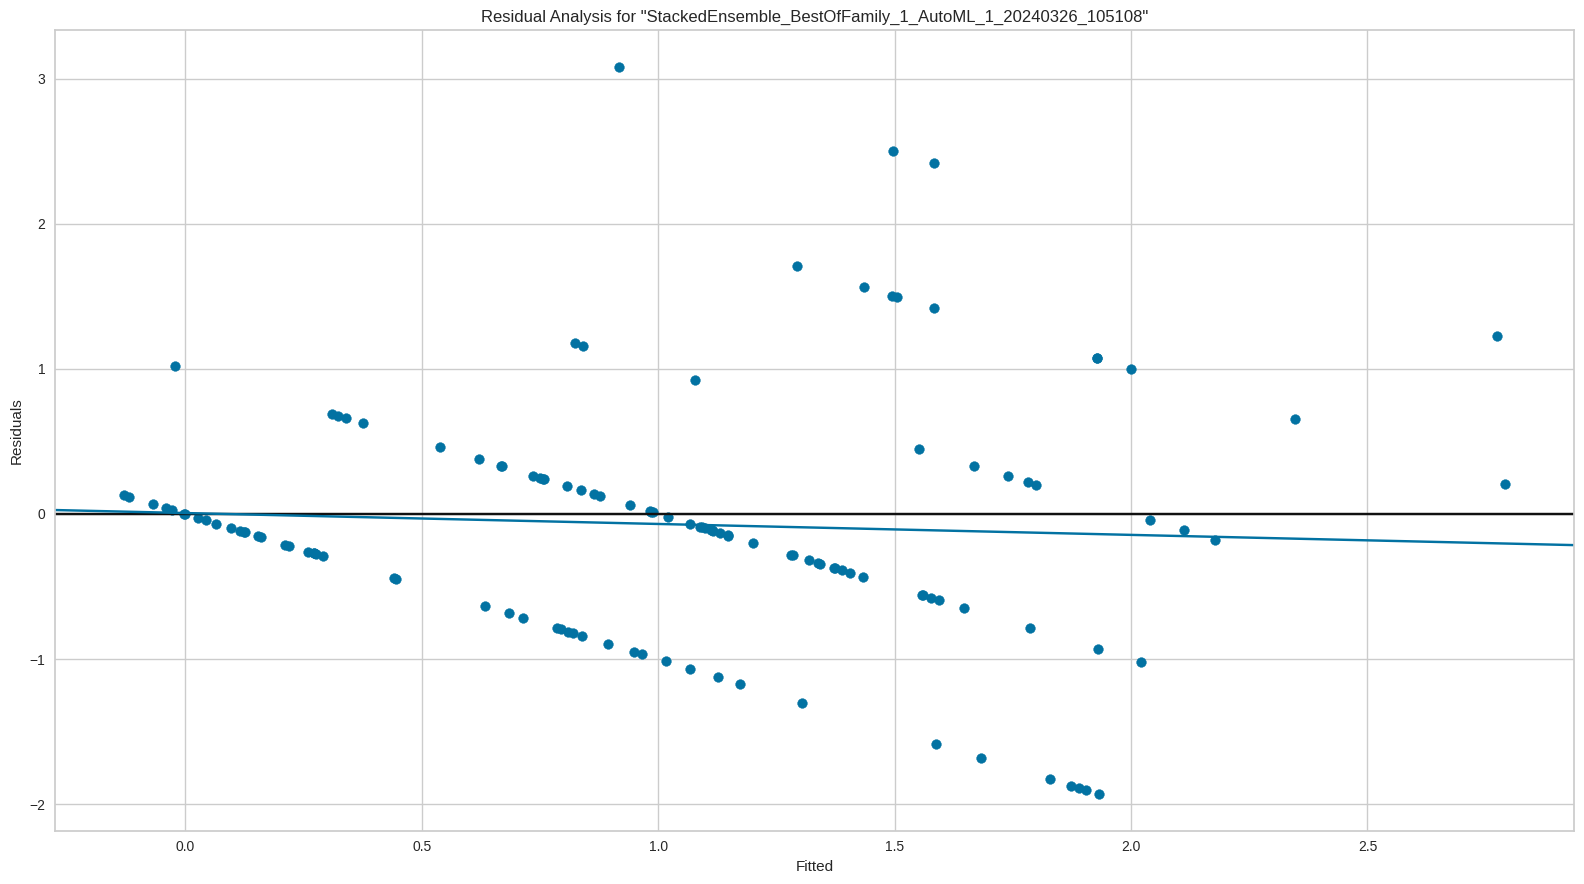

# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

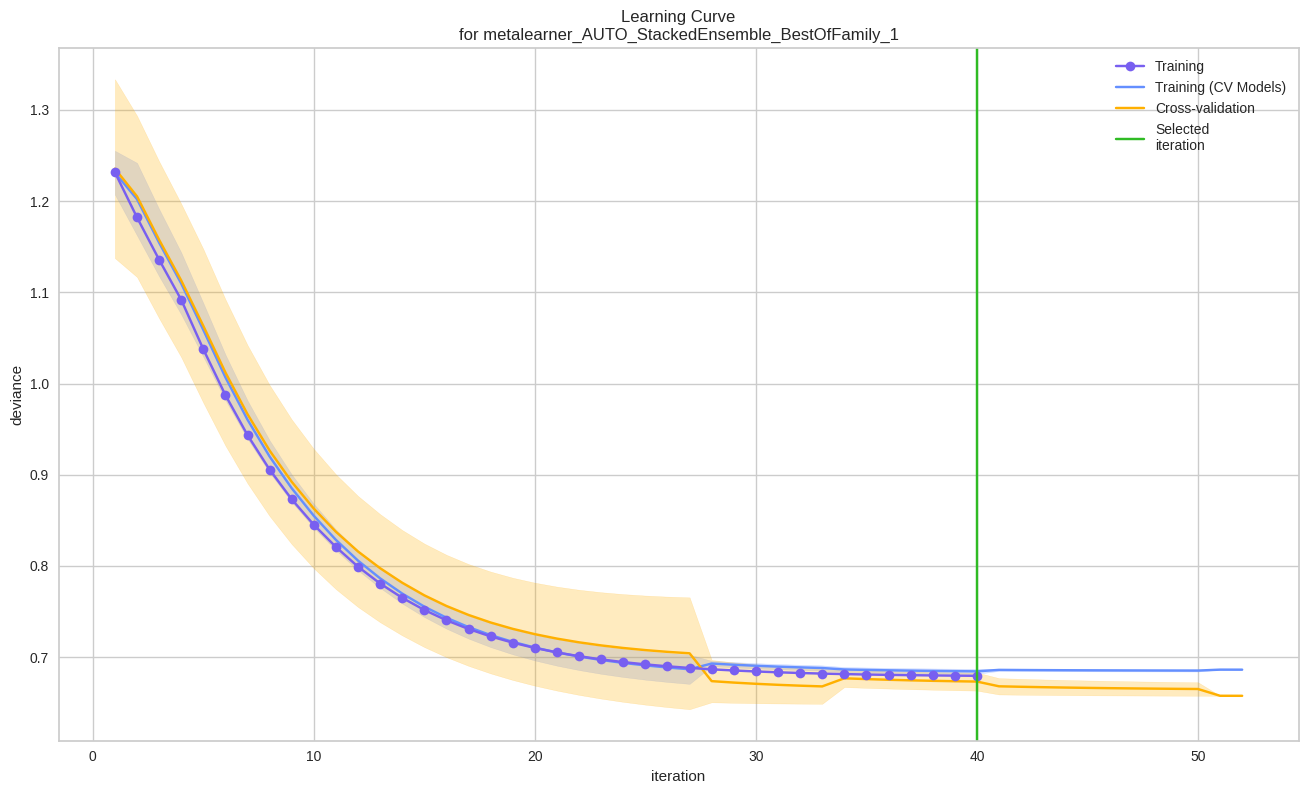

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

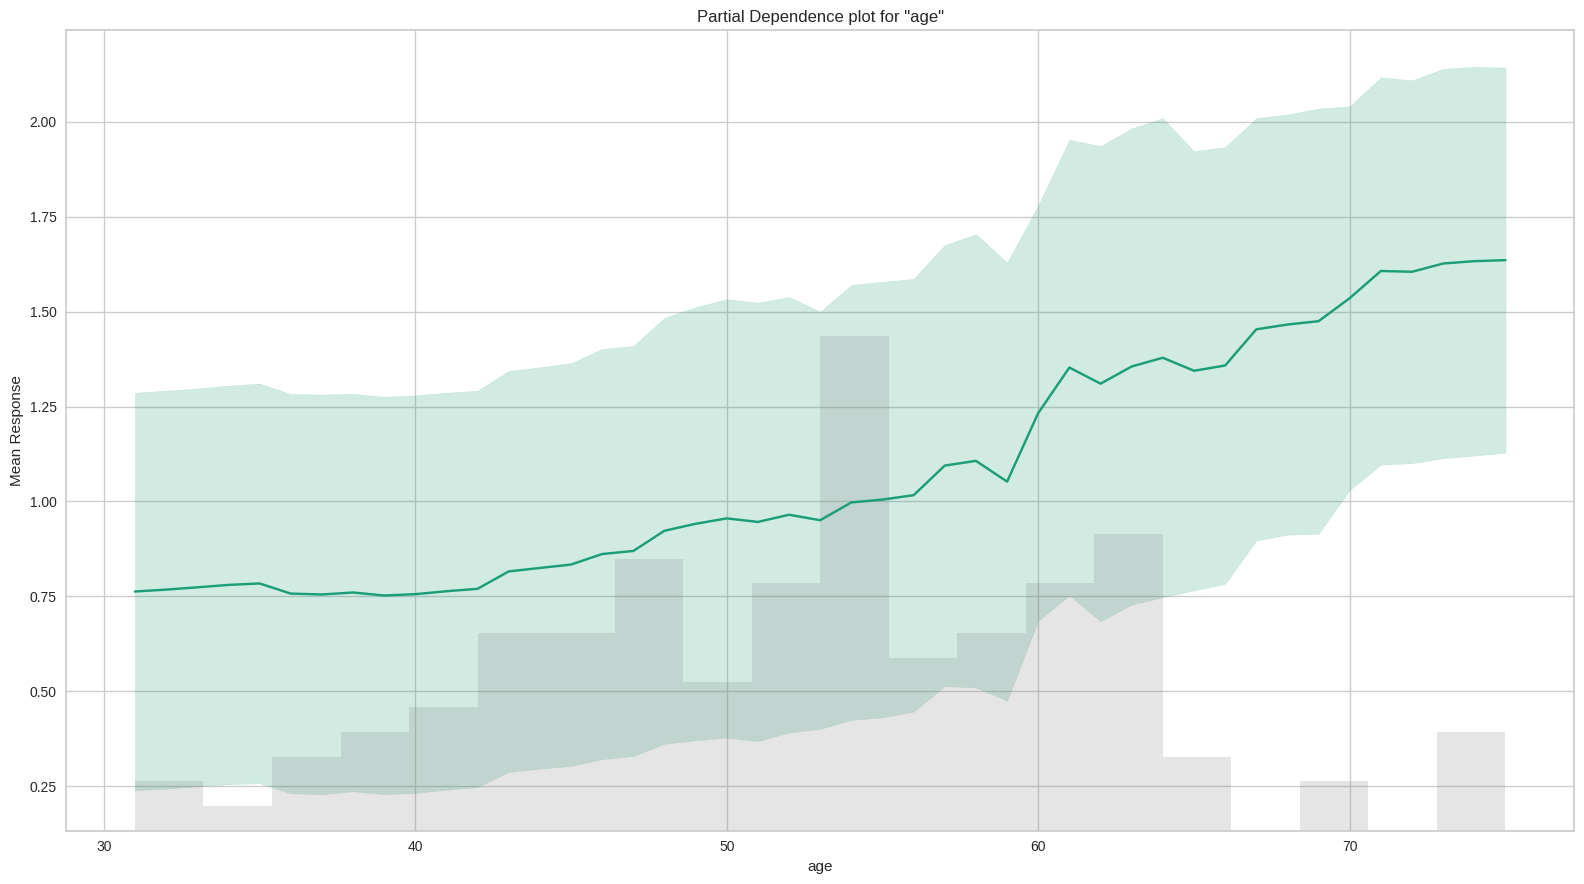

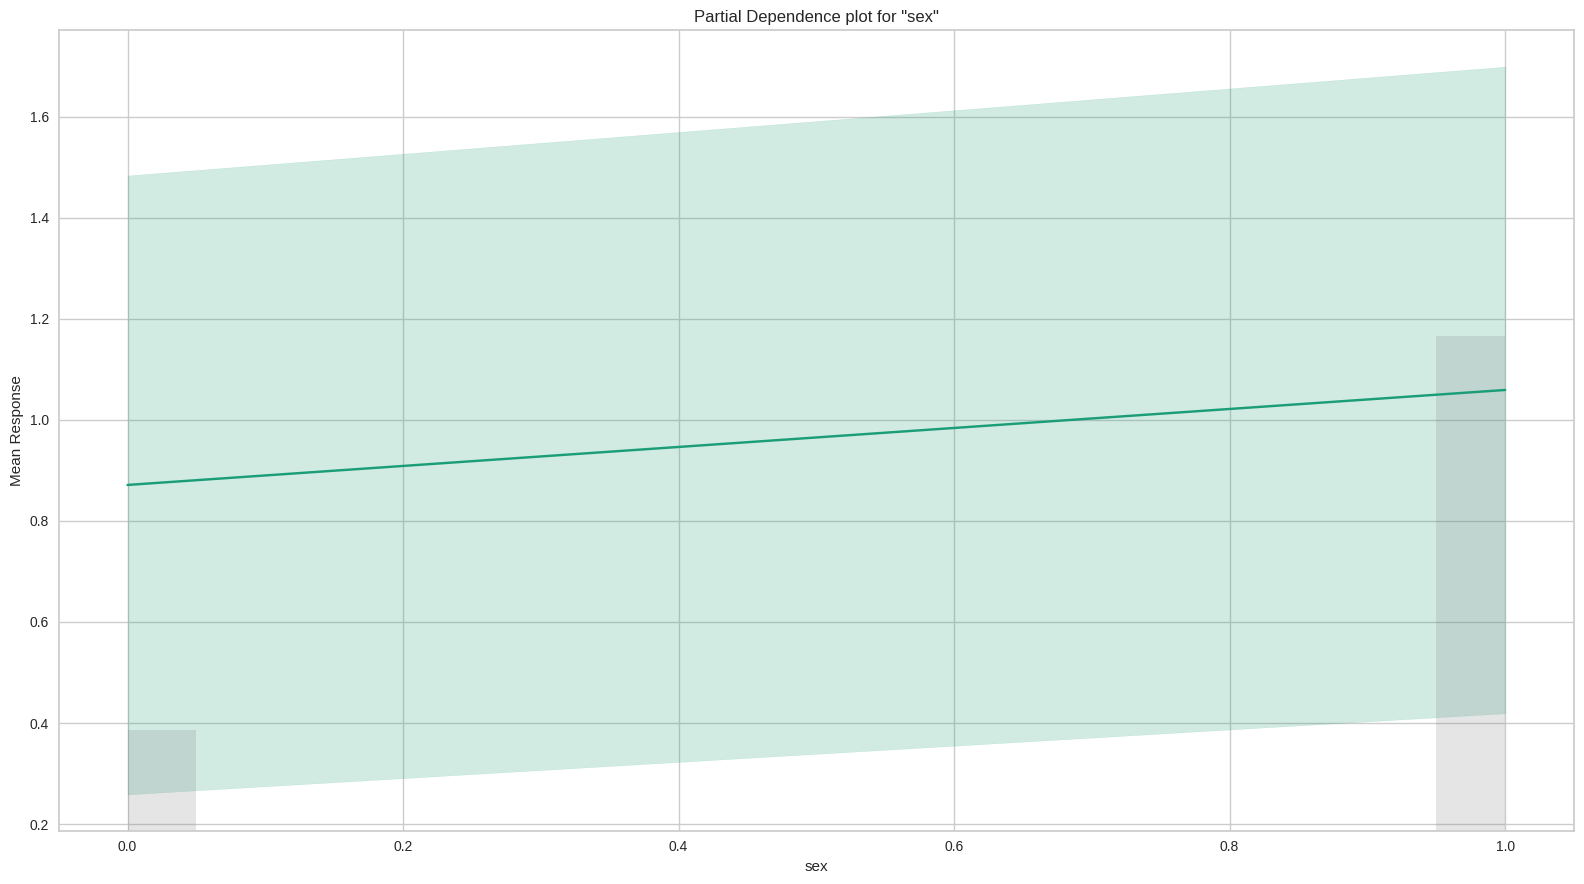

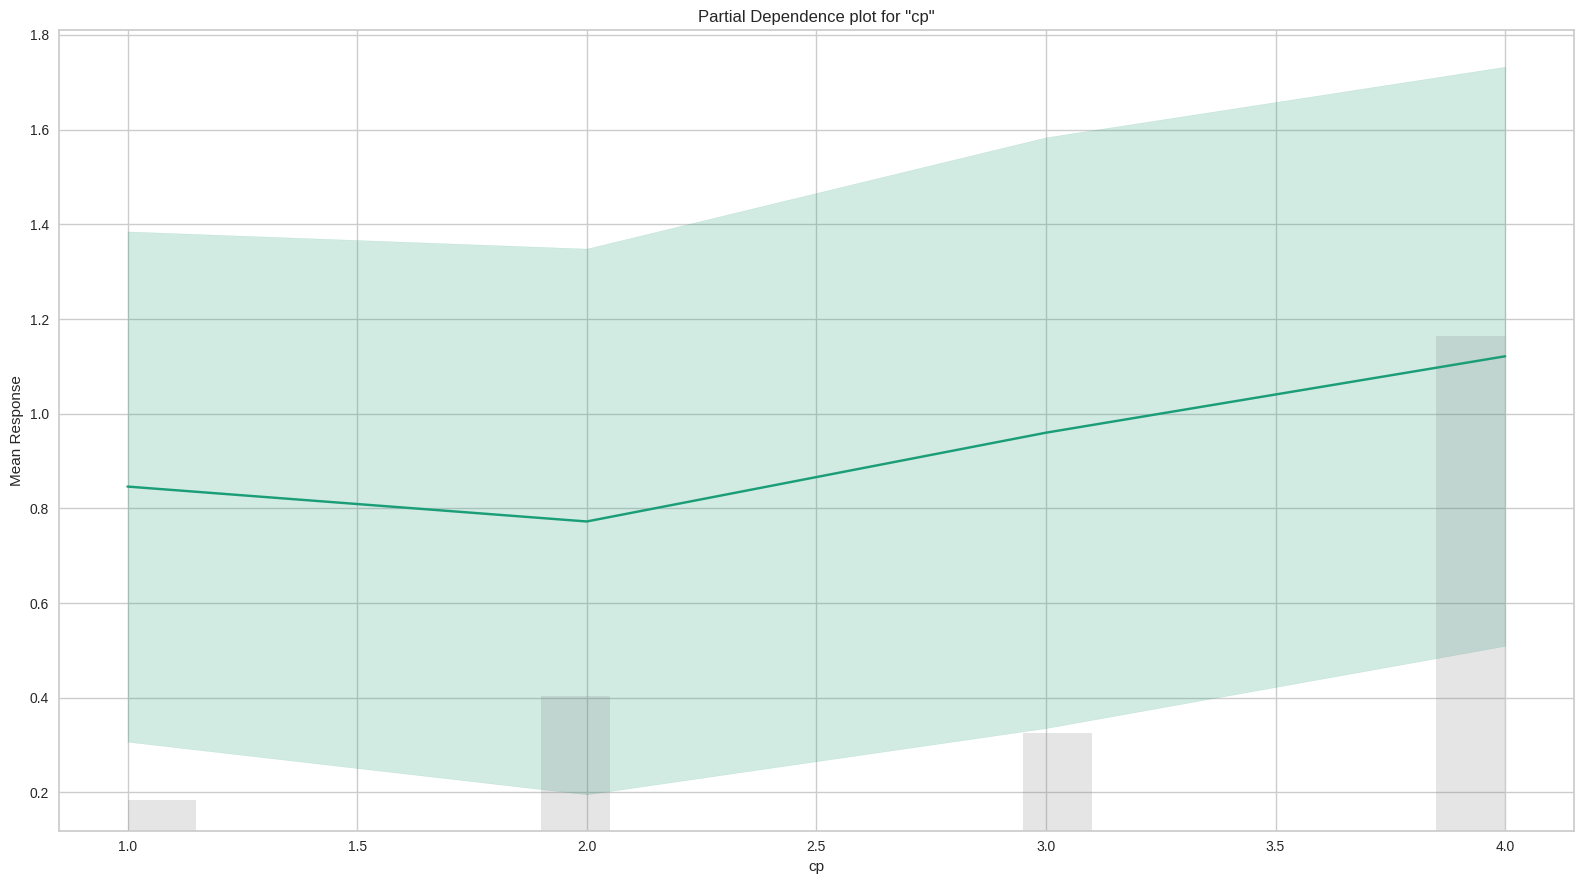

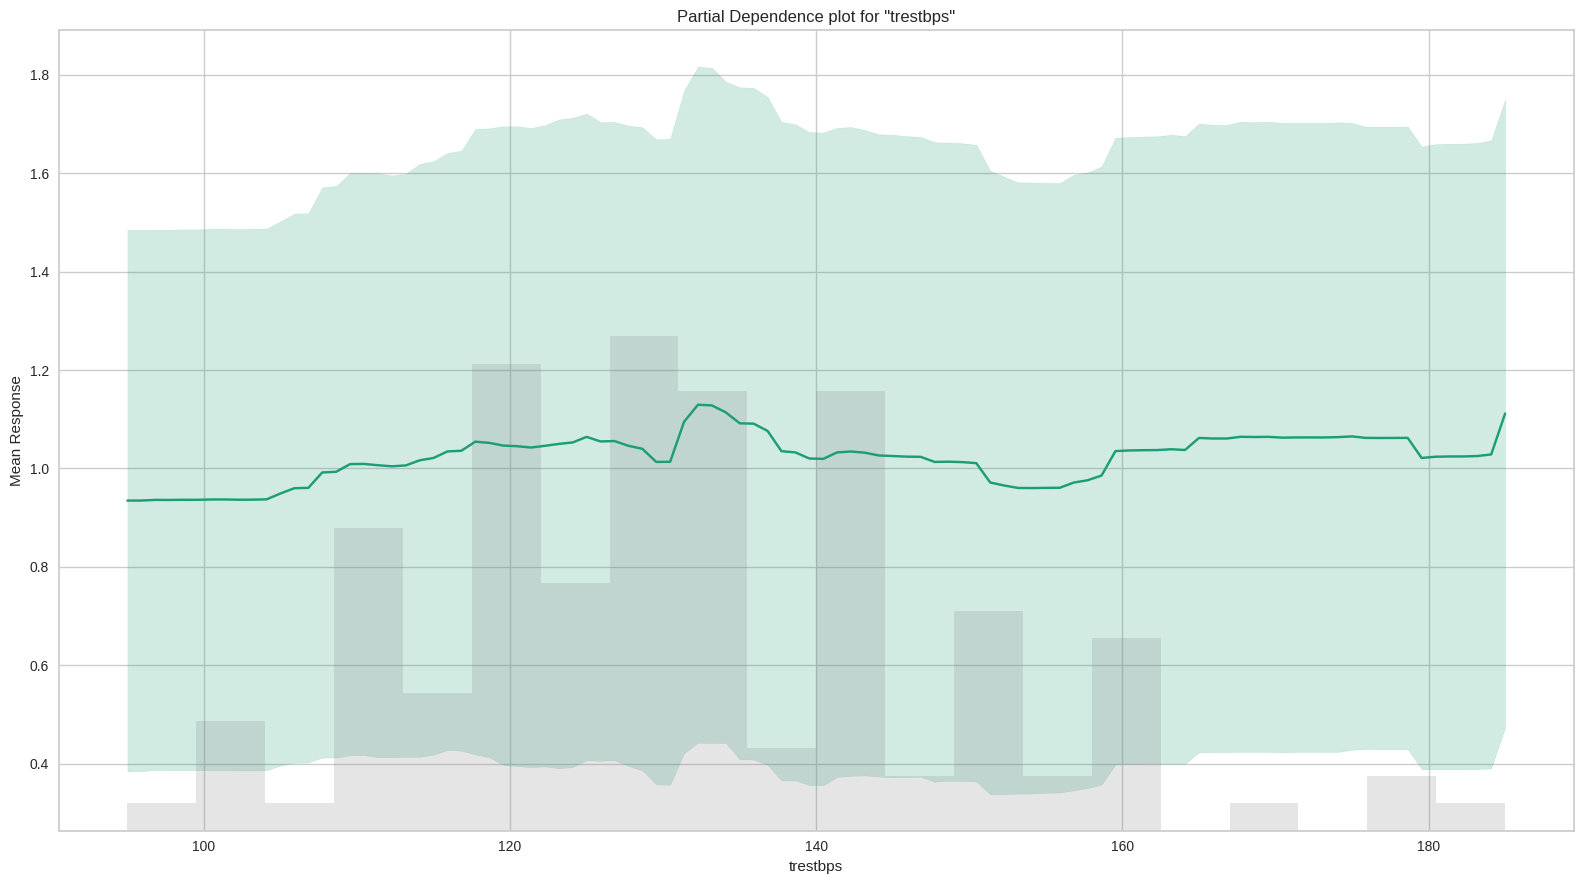

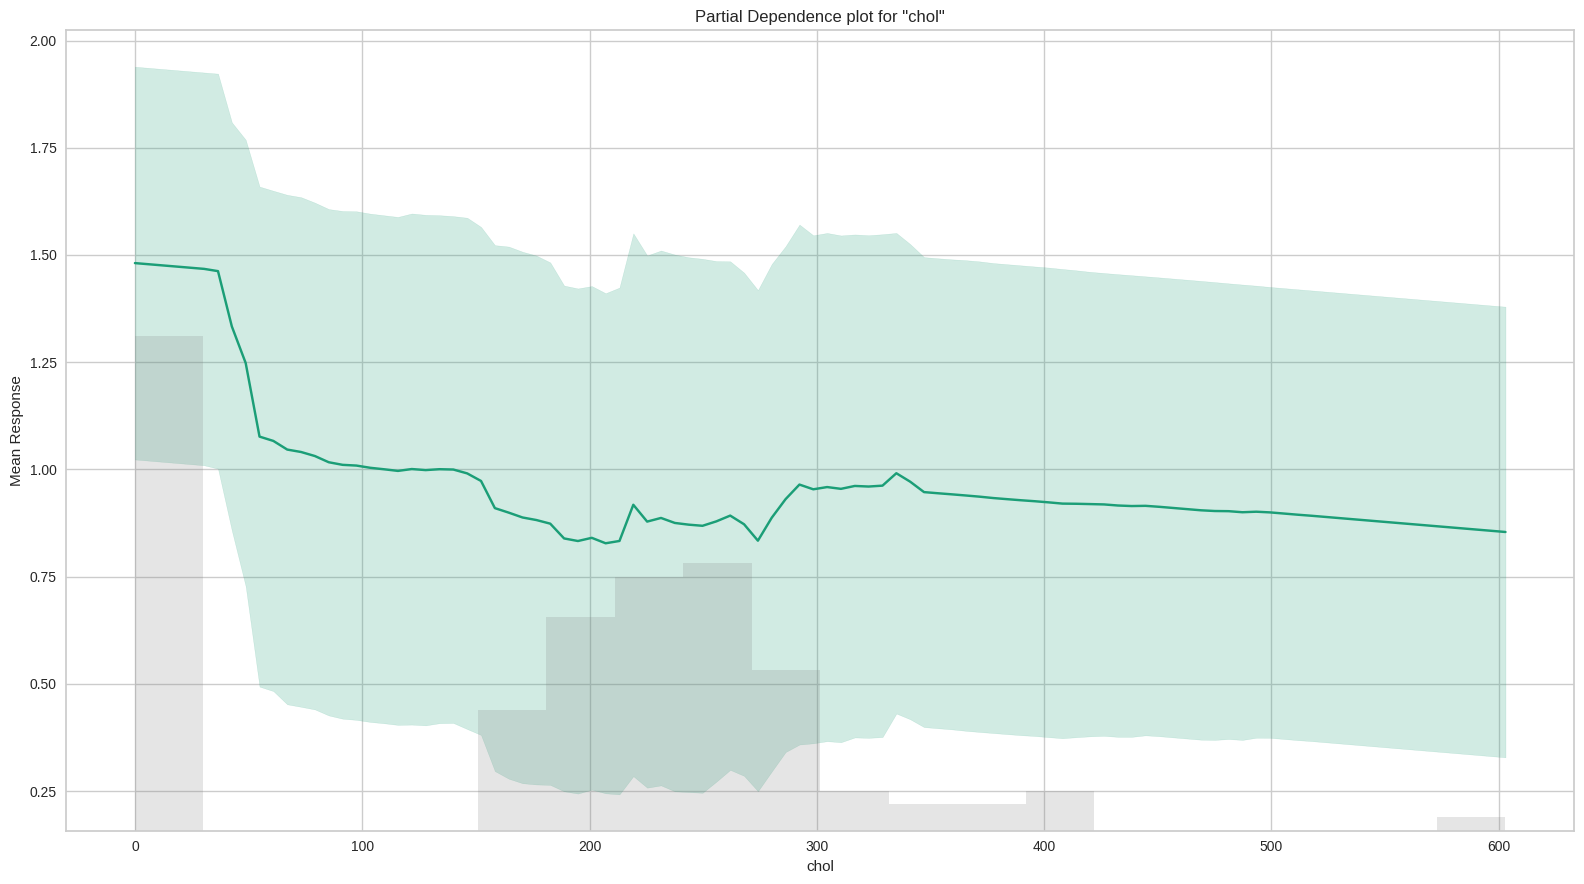

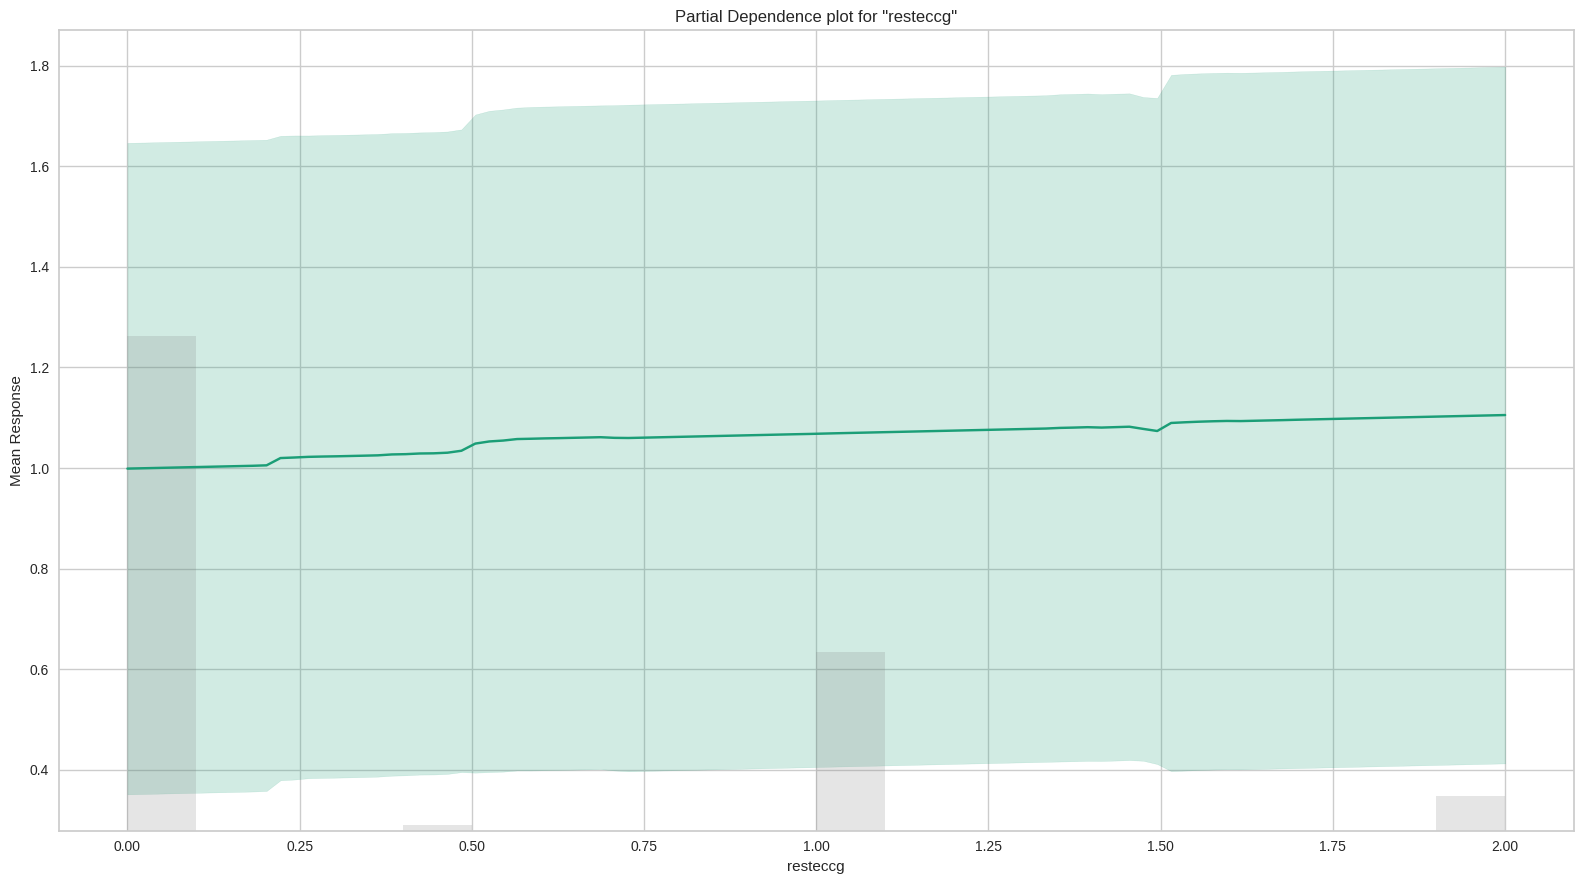

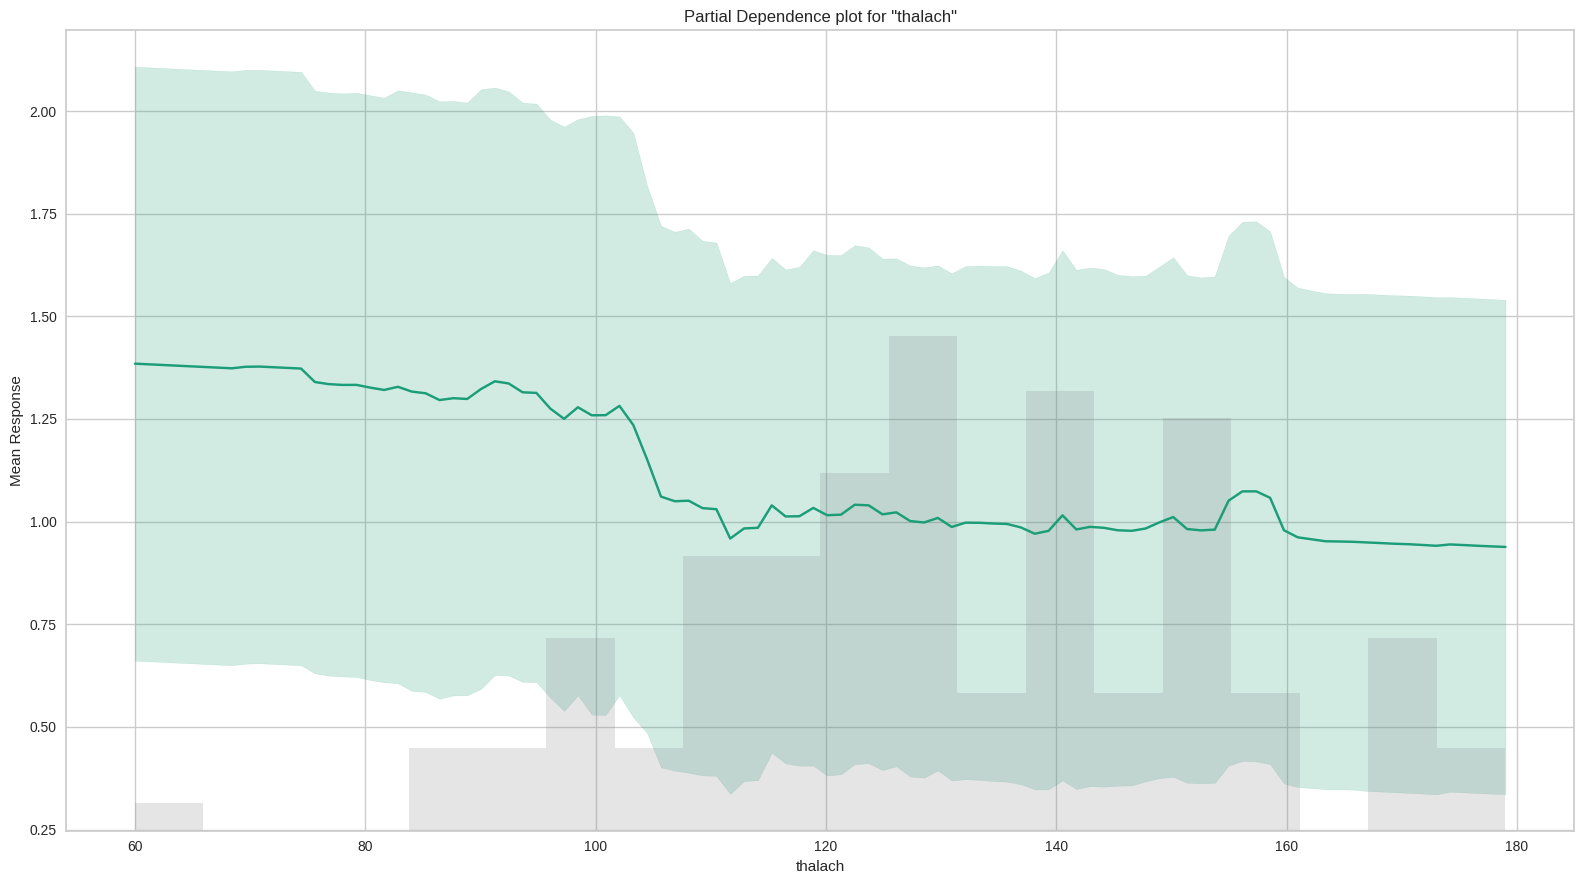

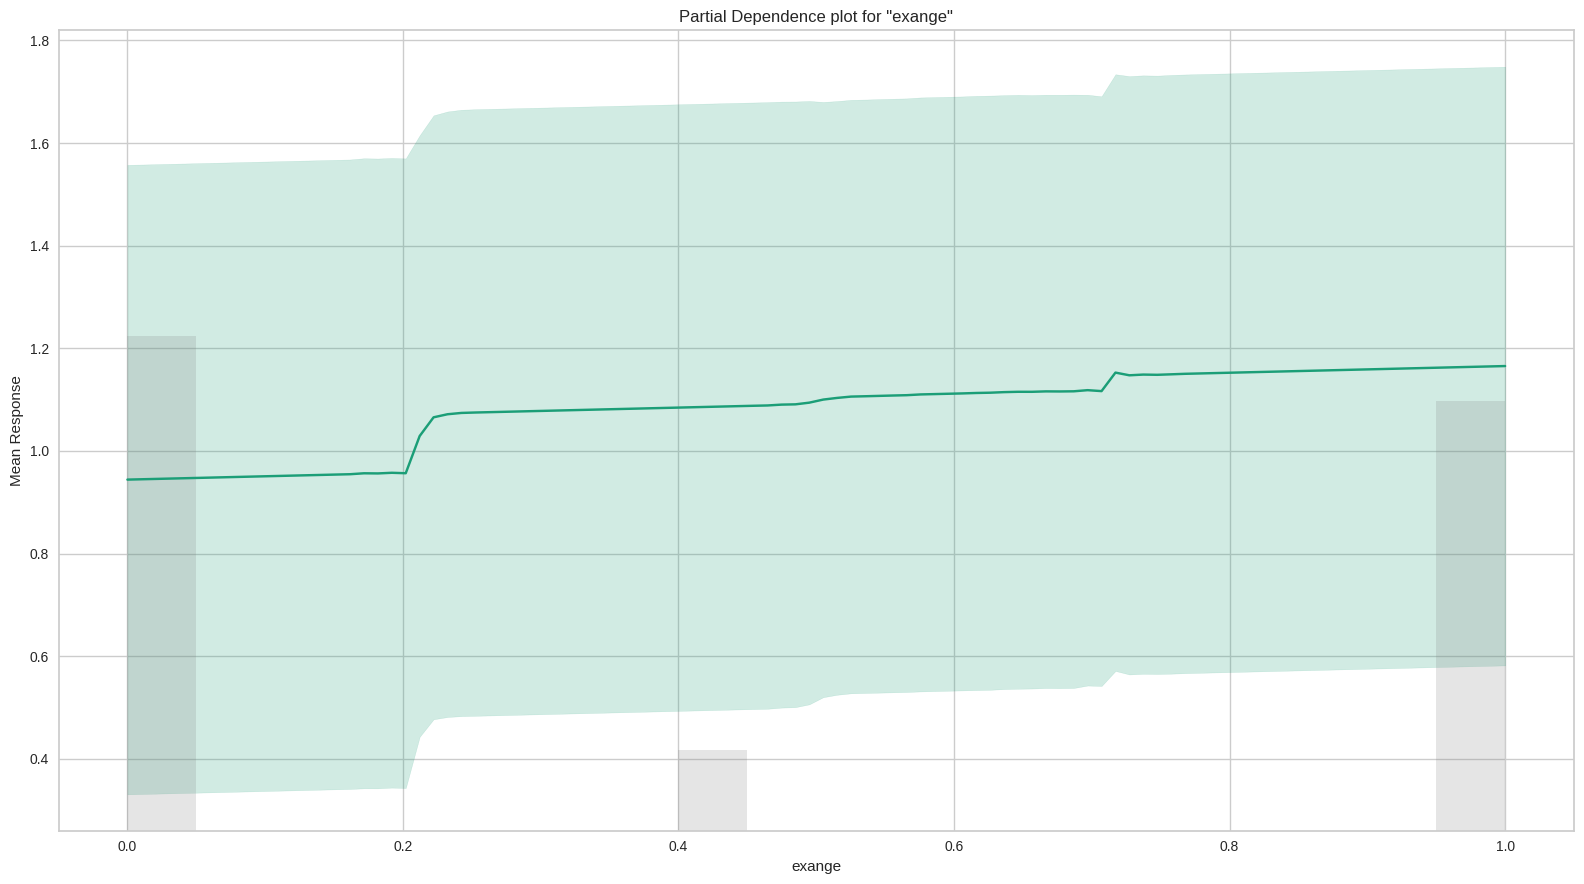

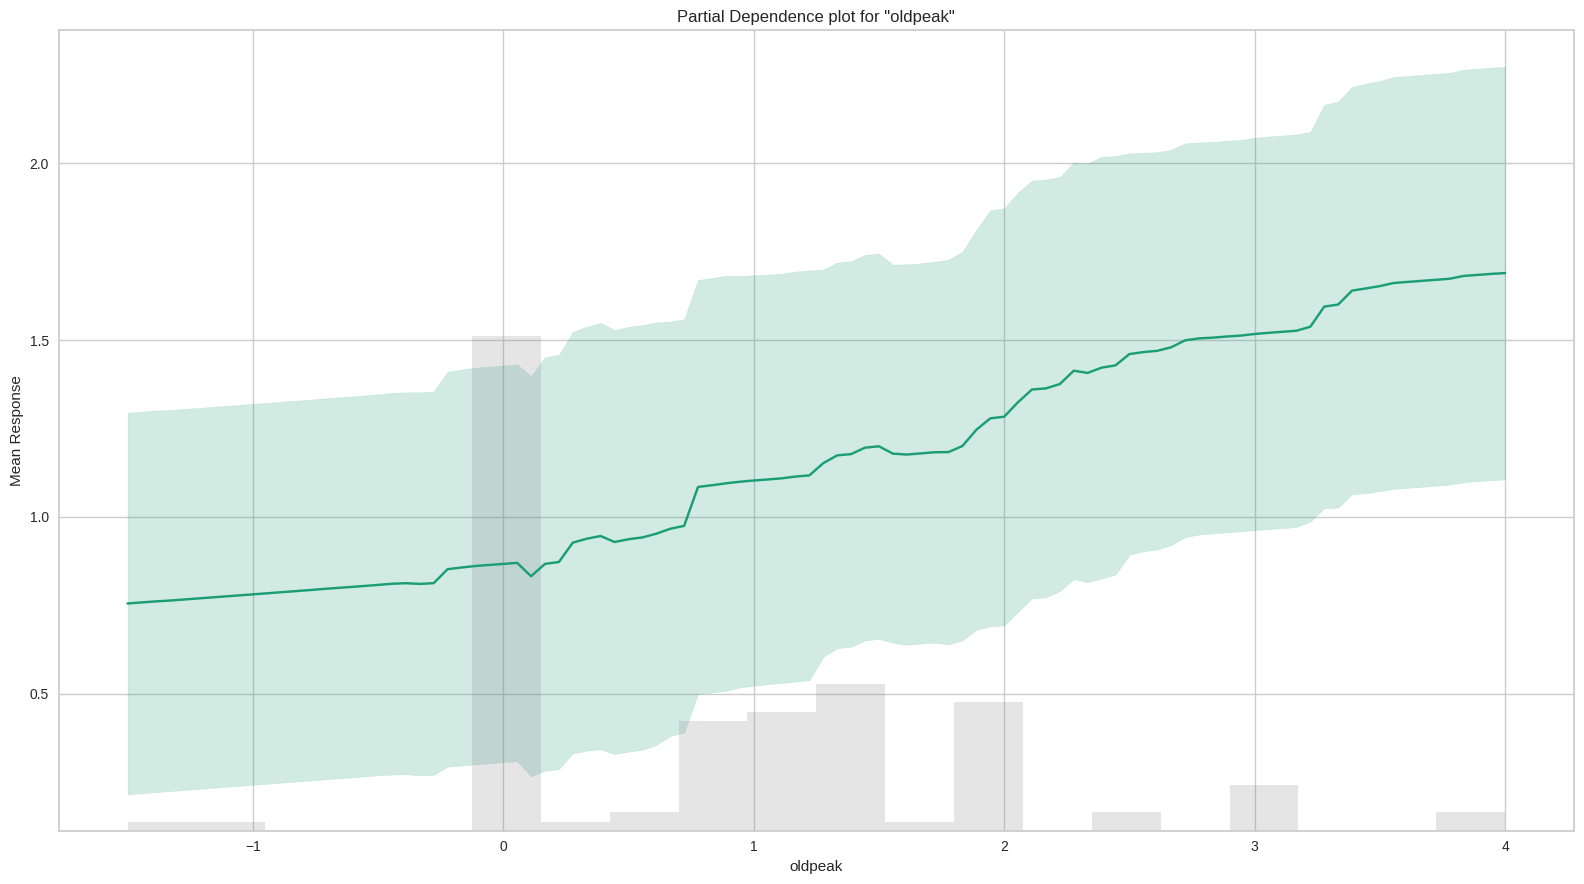

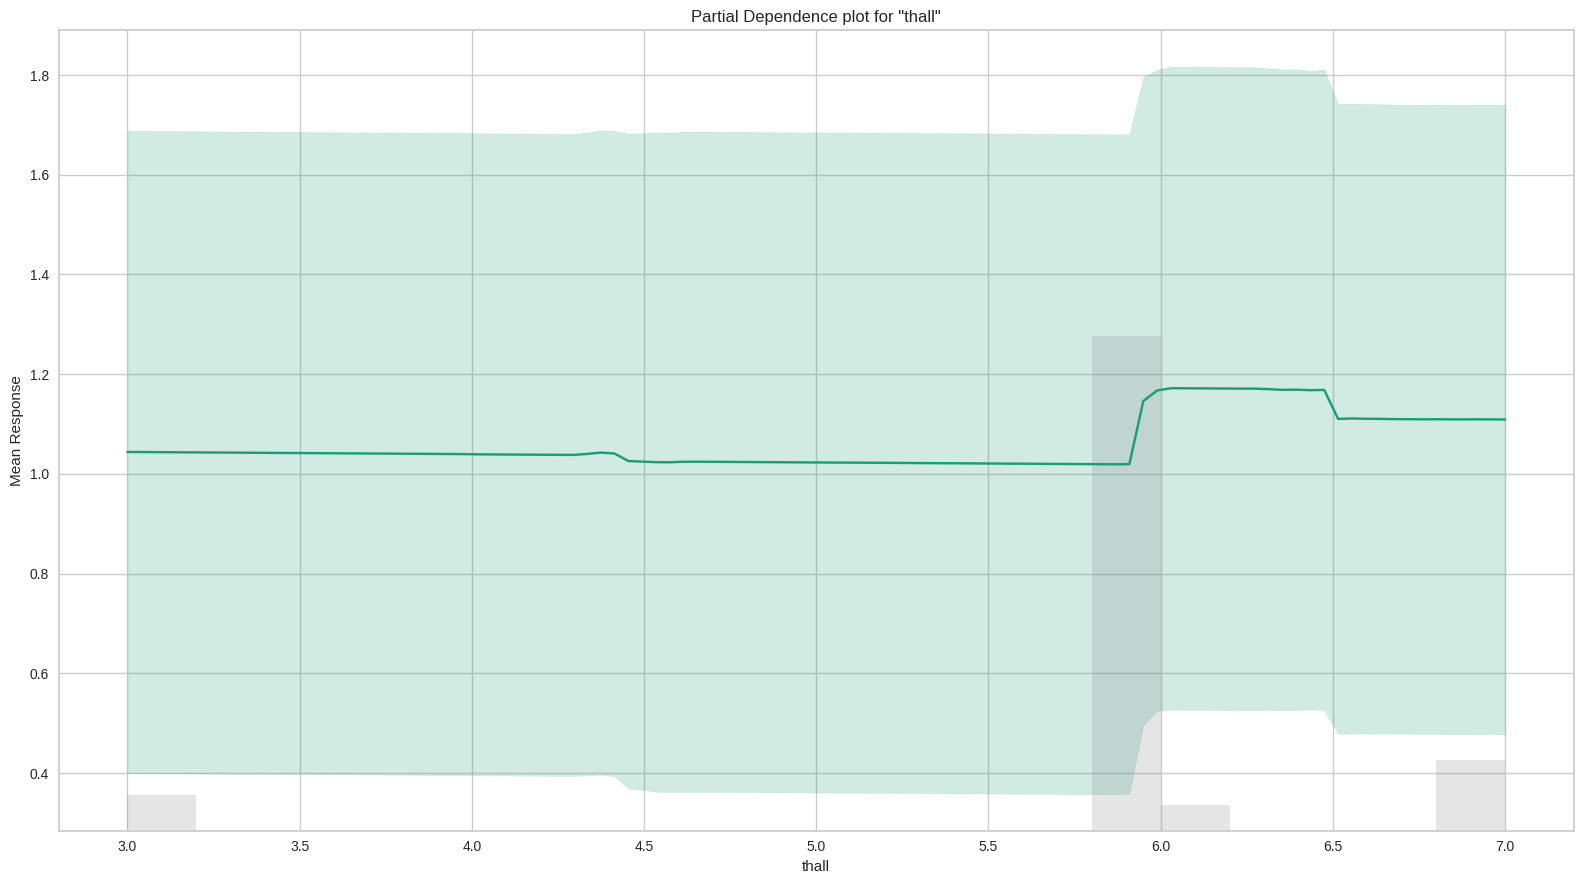

# Individual Conditional Expectation

> An Individual Conditional Expectation (ICE) plot gives a graphical depiction of the marginal effect of a variable on the response. ICE plots are similar to partial dependence plots (PDP); PDP shows the average effect of a feature while ICE plot shows the effect for a single instance. This function will plot the effect for each decile. In contrast to the PDP, ICE plots can provide more insight, especially when there is stronger feature interaction.

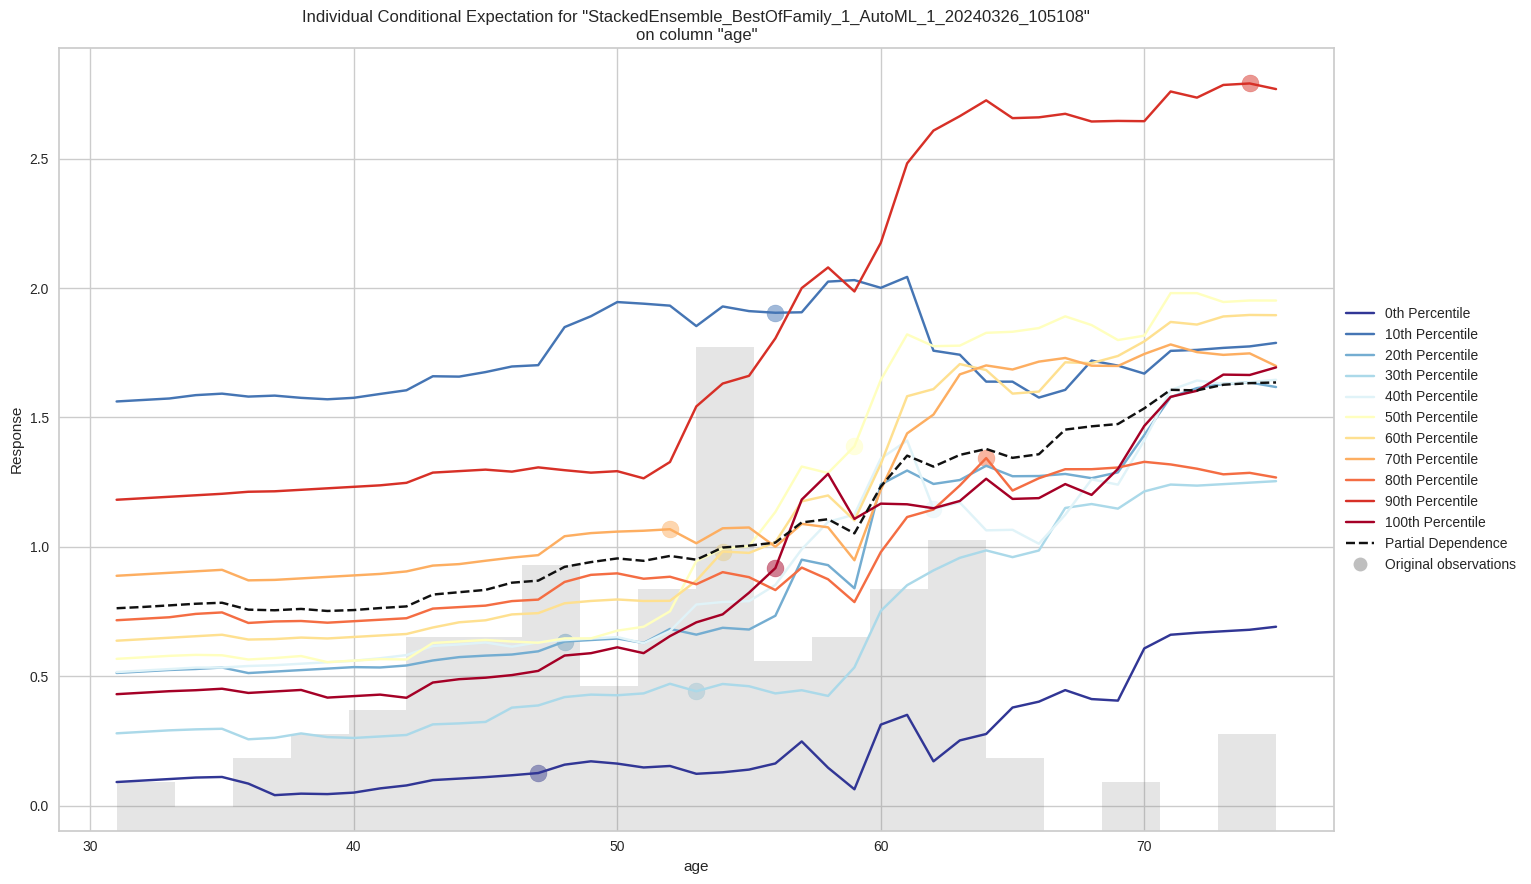

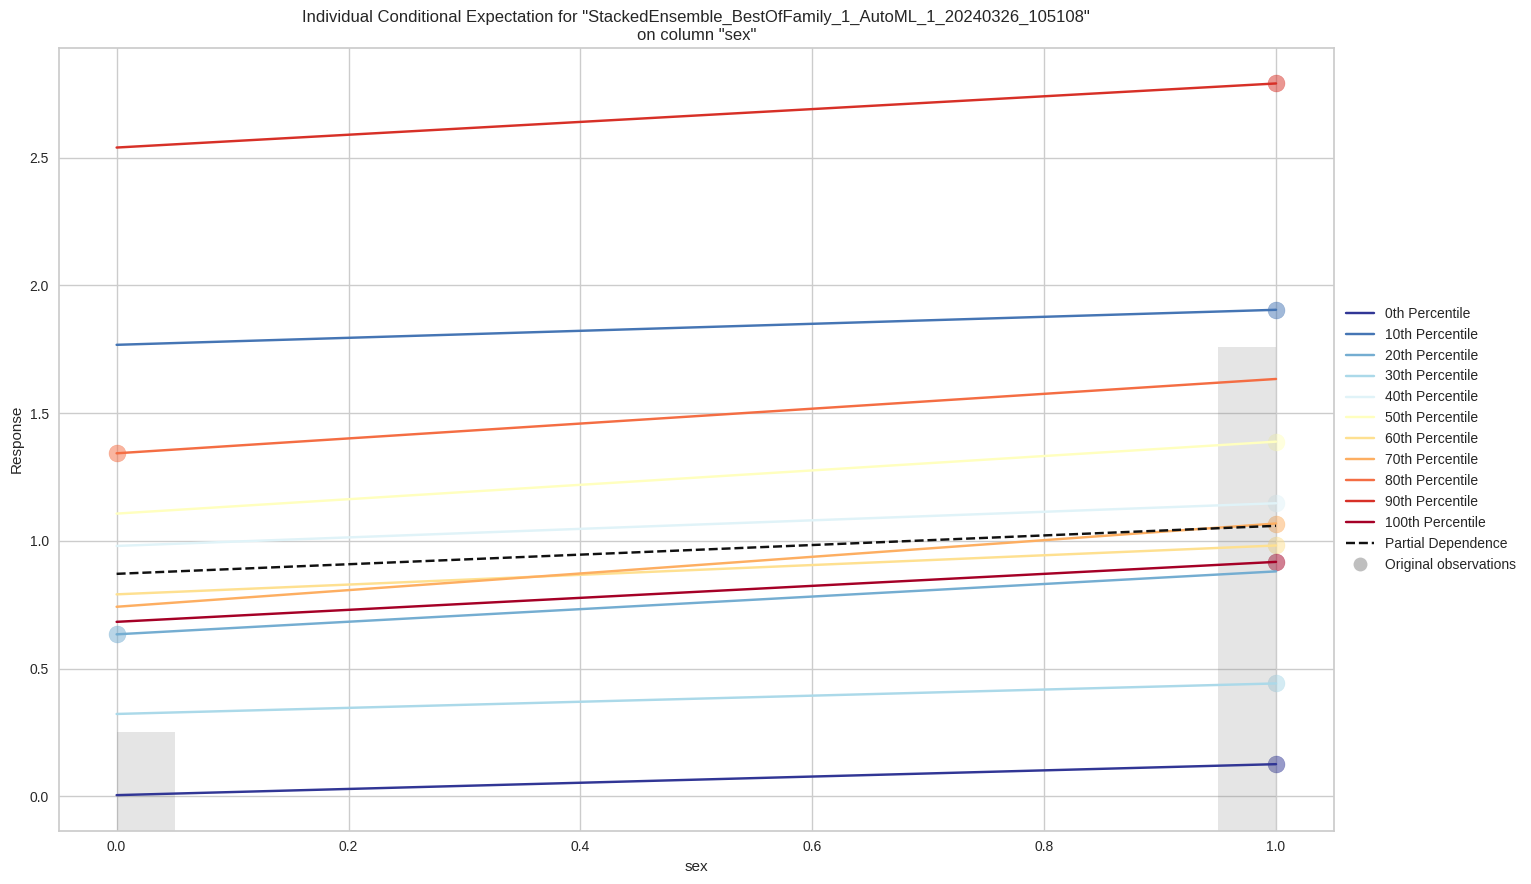

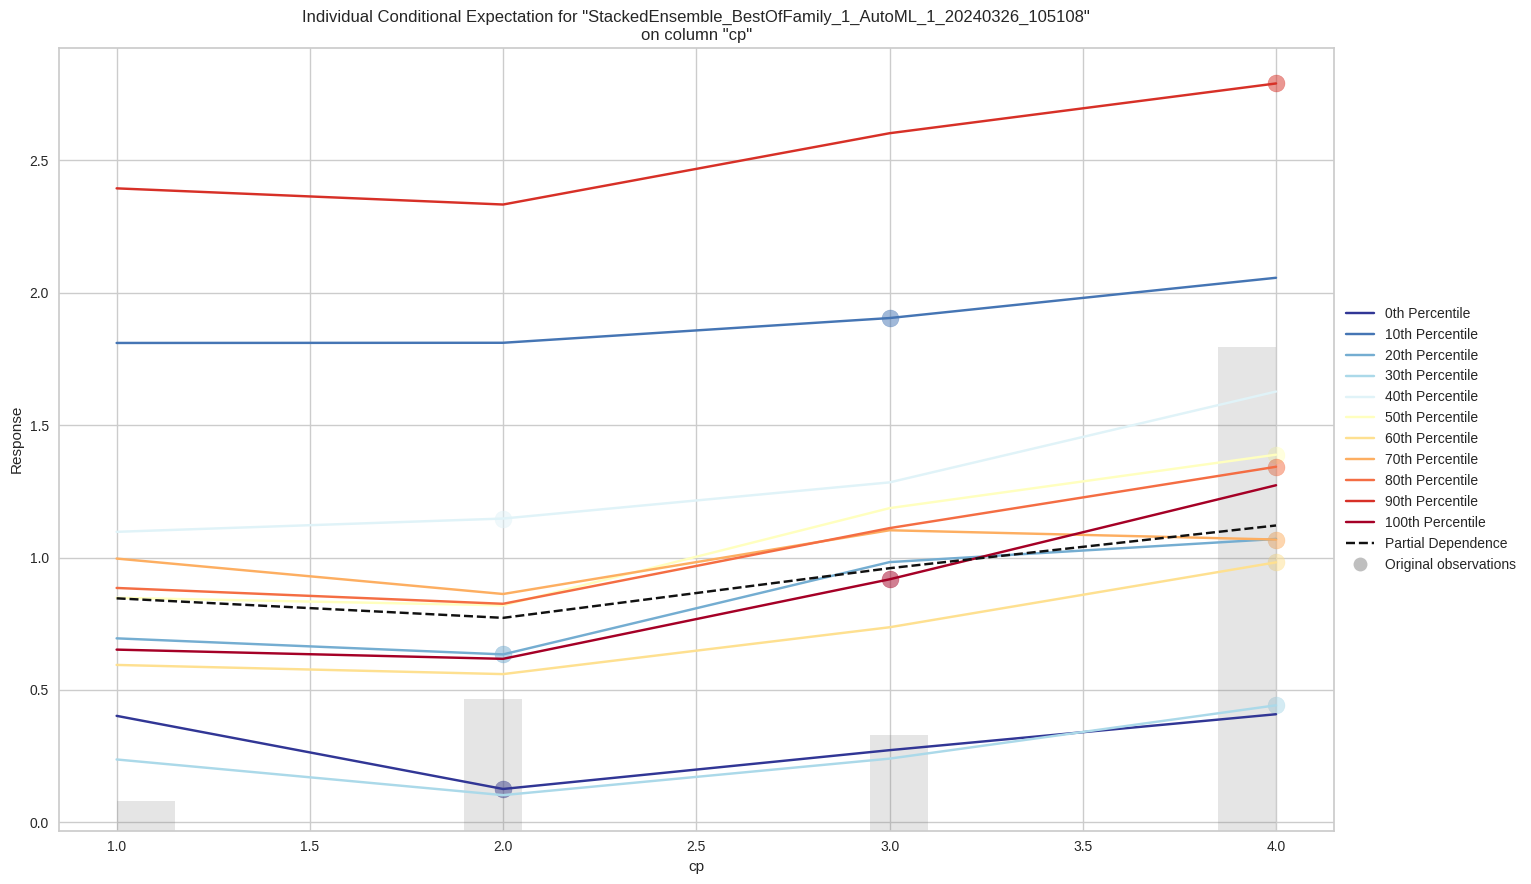

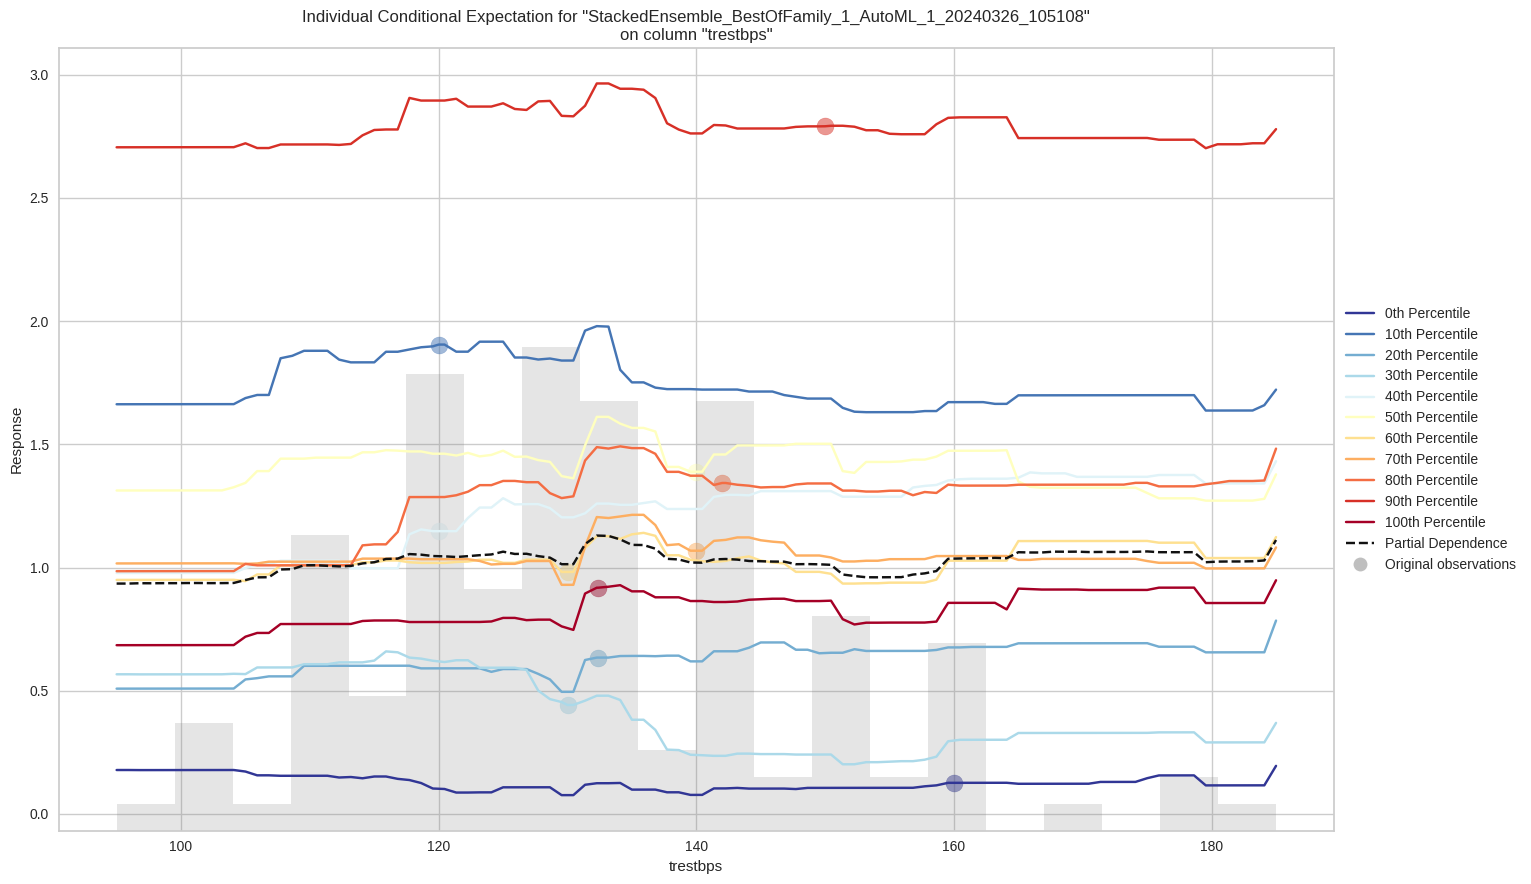

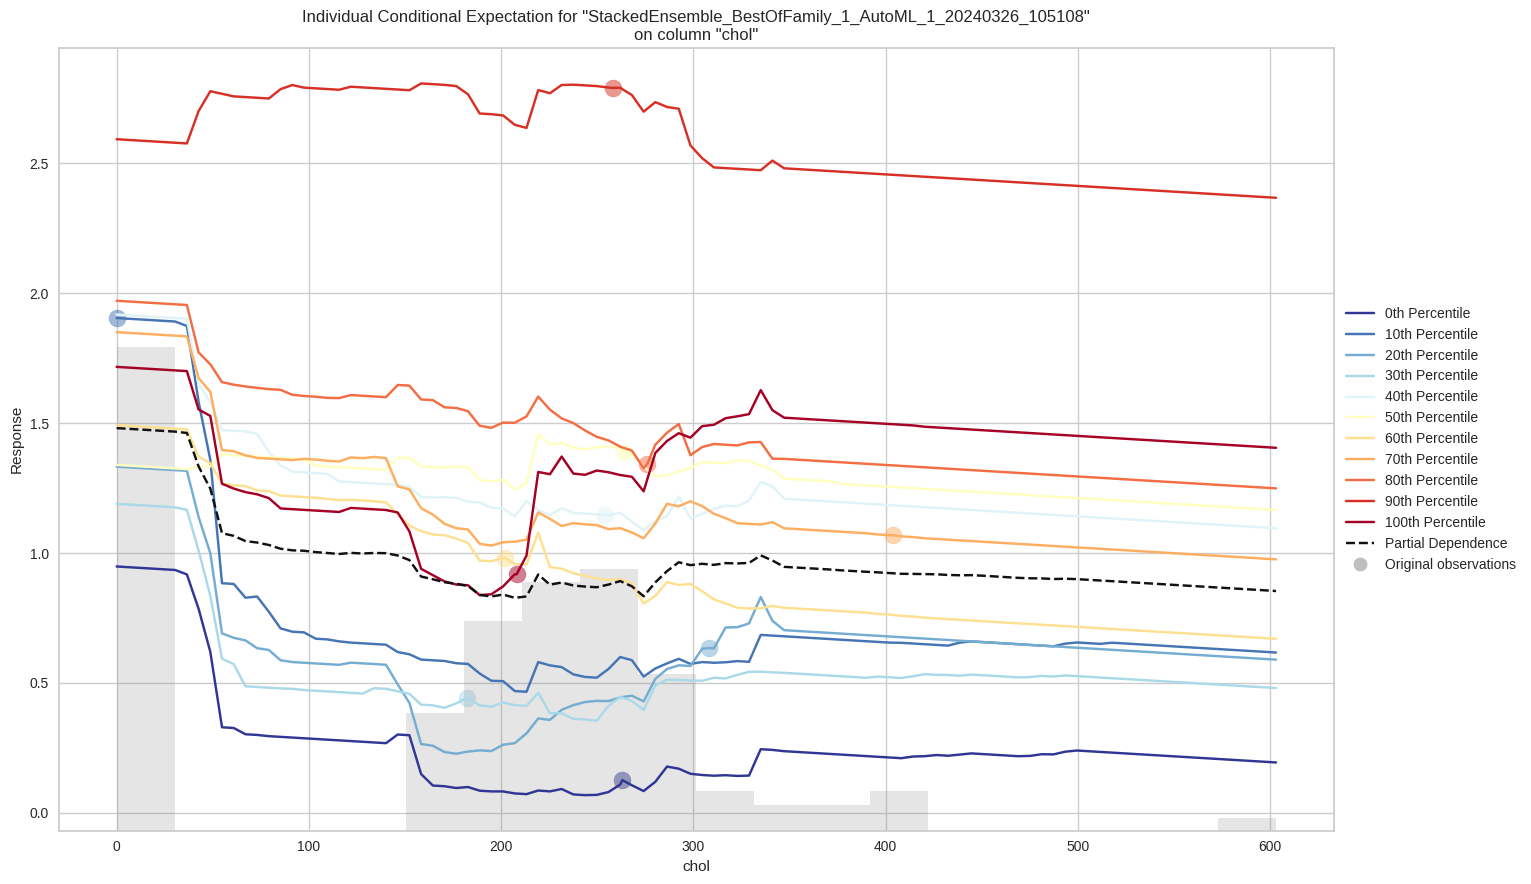

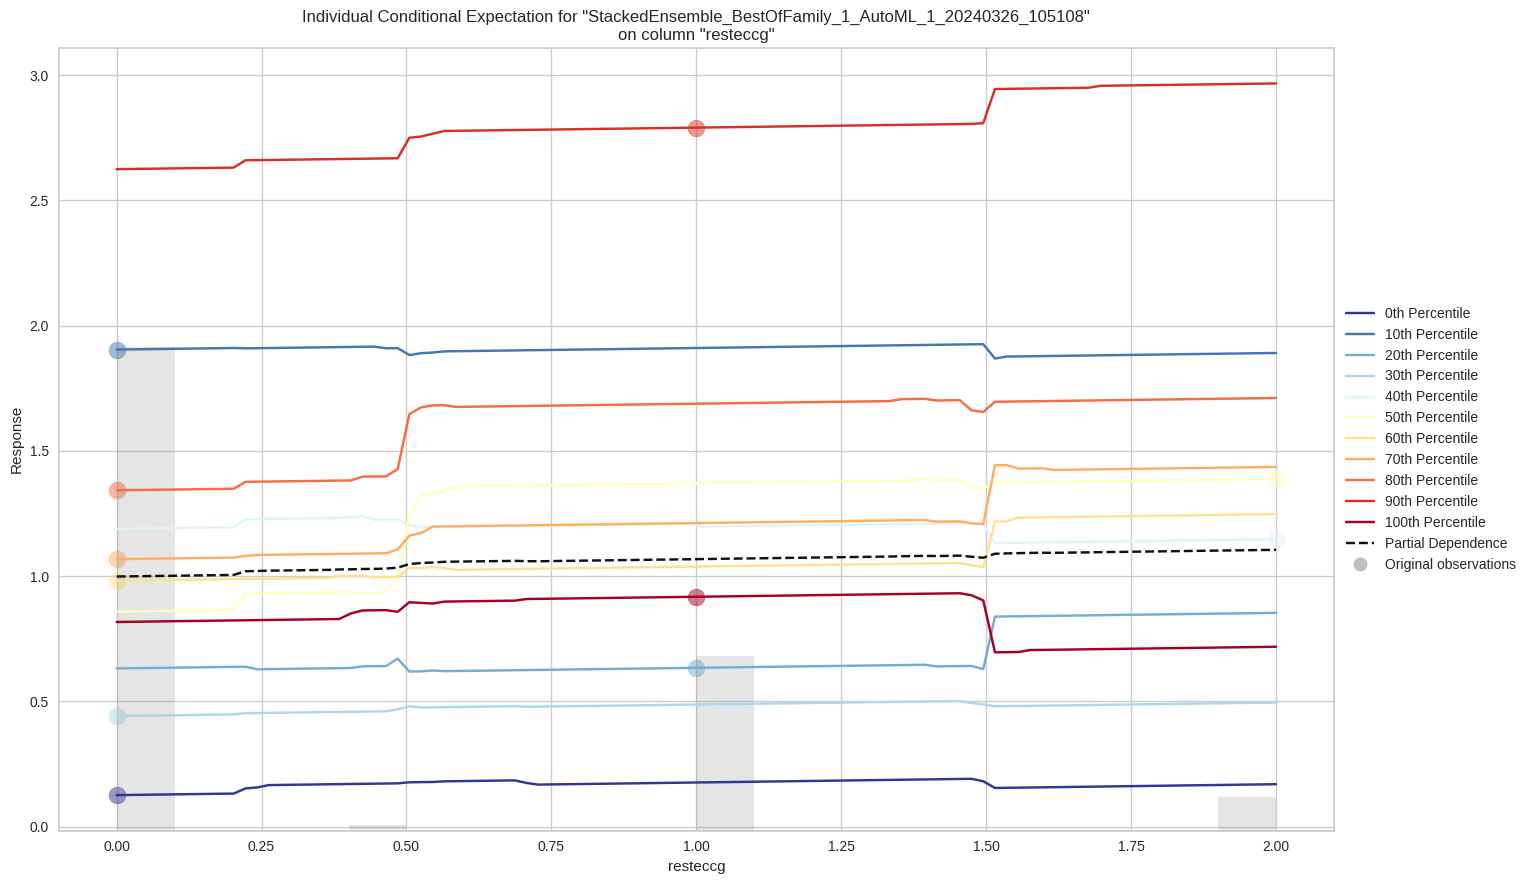

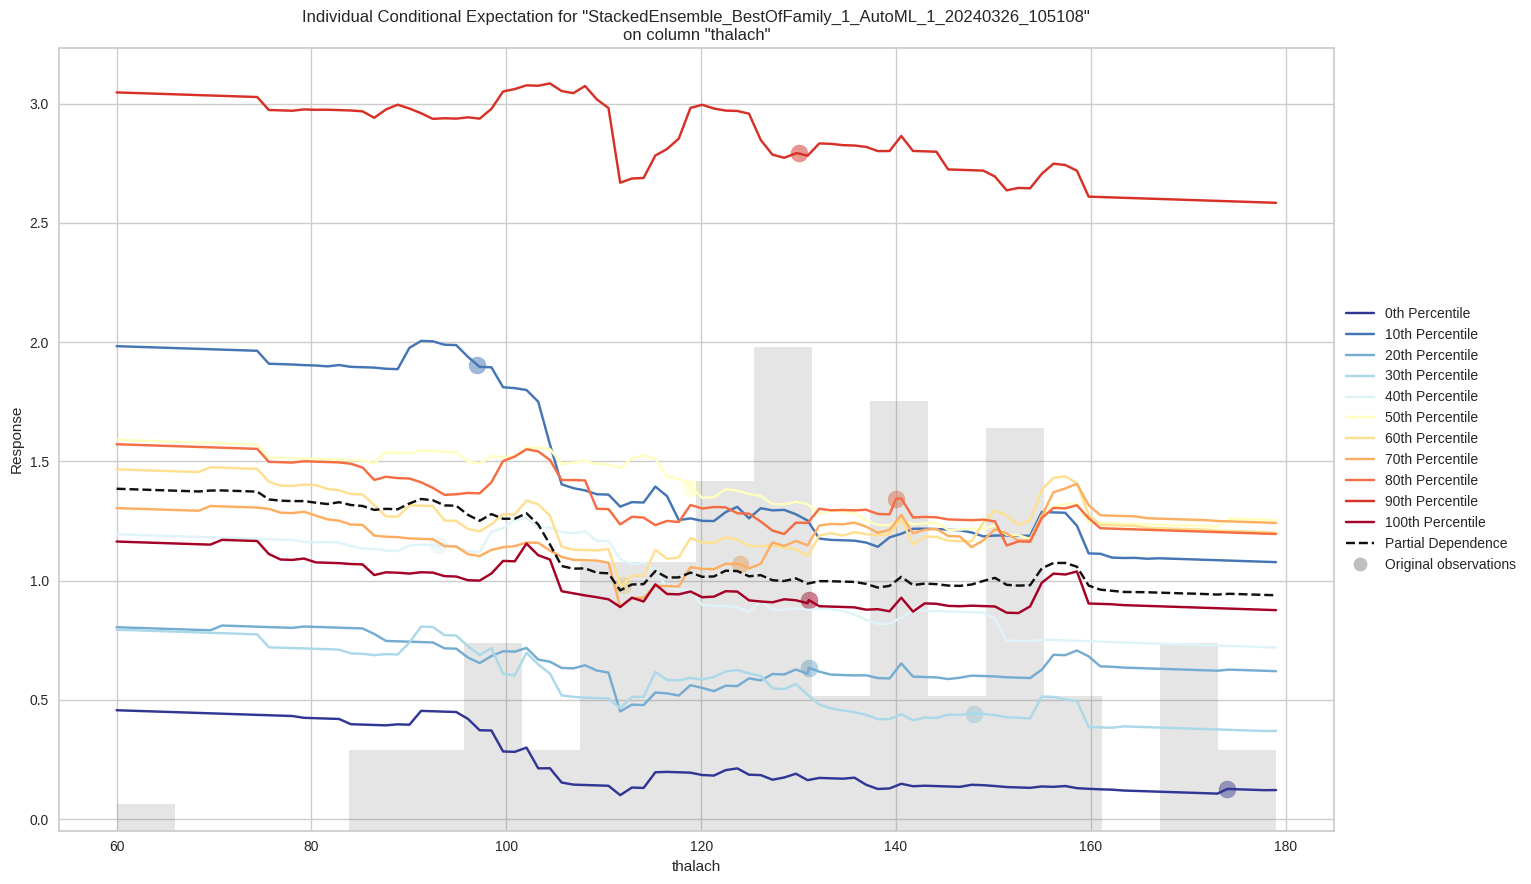

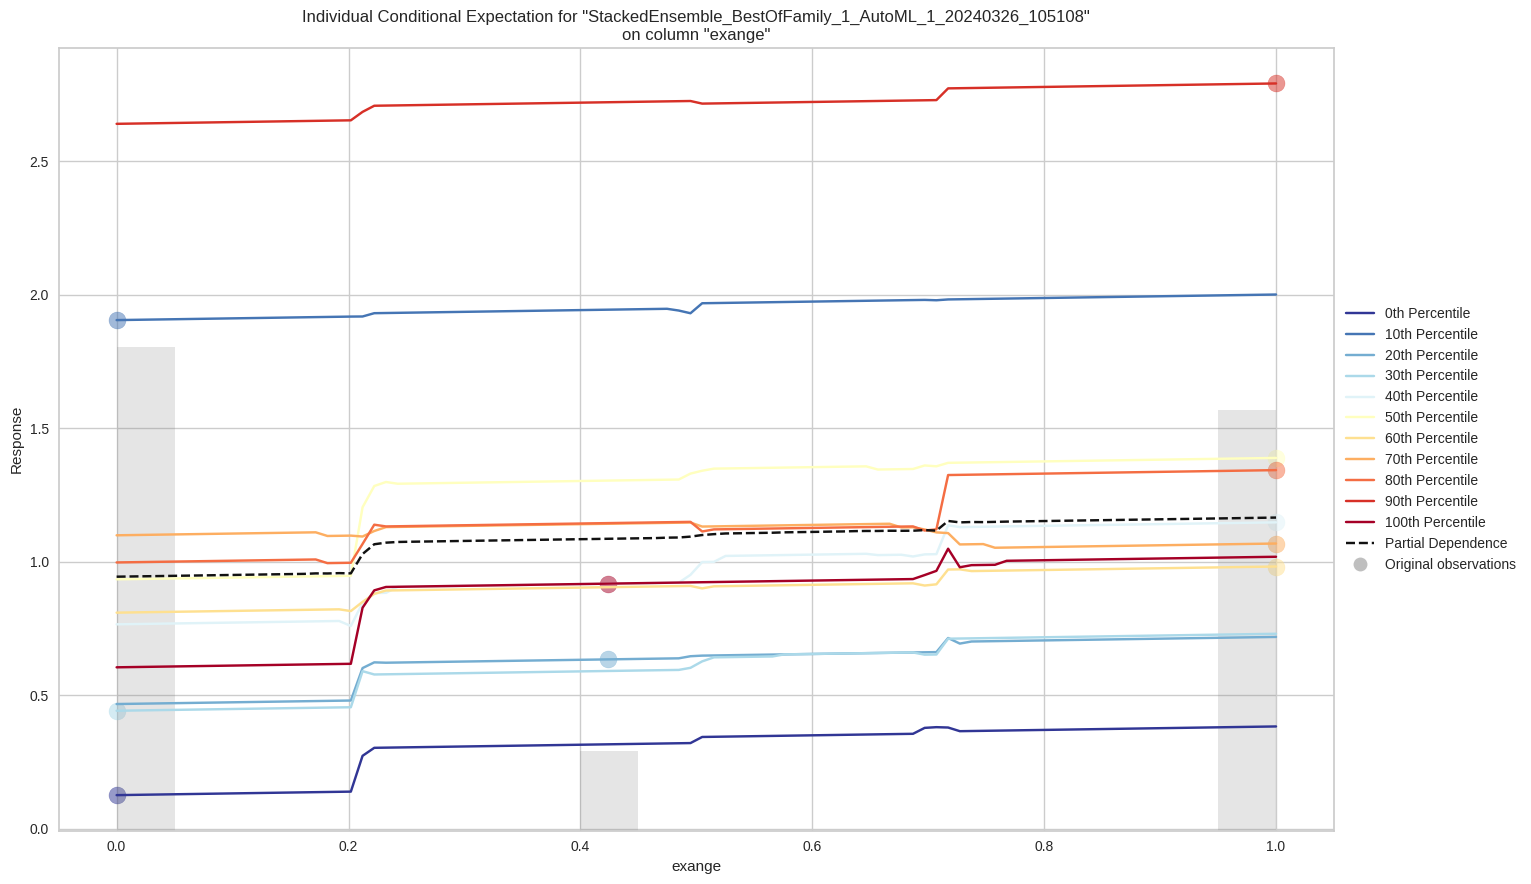

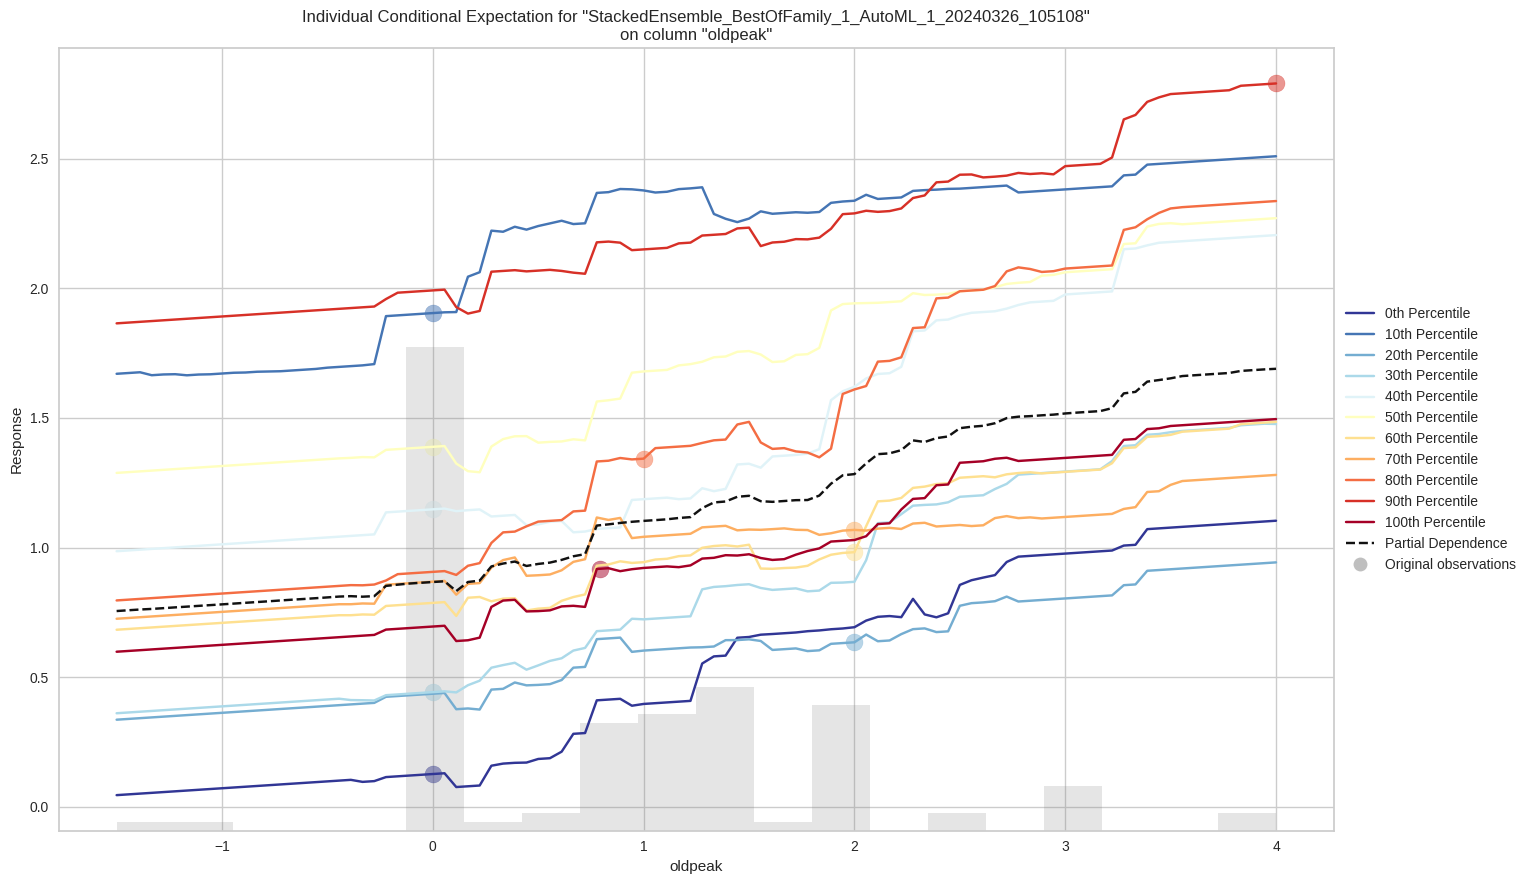

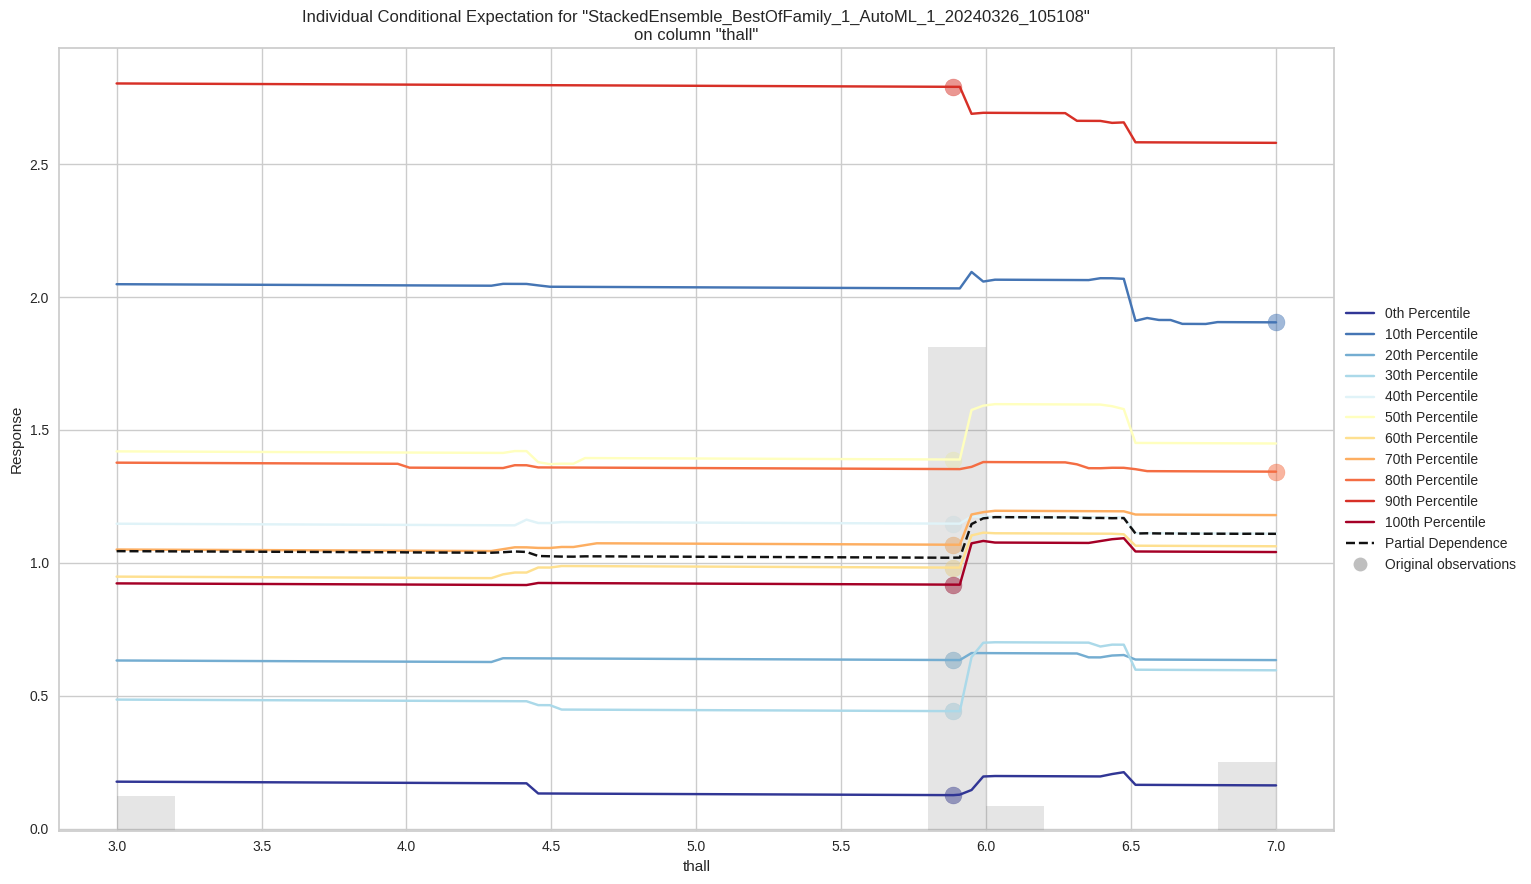



En iyi modelin ismi: StackedEnsemble_BestOfFamily_1_AutoML_1_20240326_105108


In [ ]:
from h2o.automl import H2OAutoML
from sklearn.model_selection import train_test_split
import h2o
import pandas as pd
import numpy as np

# H2O'yu başlatma
h2o.init()


column_names = ['age', 'sex','cp','trestbps','chol','fbs','resteccg','thalach','exange','oldpeak','slope','ca','thall', 'num']
df = pd.read_csv('/content/drive/MyDrive/processed.switzerlandUpdated.data',header=None ,names=column_names ,na_values='?')

x=df.drop(['num' ,'ca','fbs','slope'],axis=1).values         #Dataframe değil de numpy array formatında olması için sonuna .values ekledim
y=df['num']

# NumPy dizisini DataFrame'e dönüştürme
x_df = pd.DataFrame(data=x, columns=['age', 'sex','cp','trestbps','chol','resteccg','thalach','exange','oldpeak','thall'])  # Sütun isimleri, veri setinizdeki sütunların gerçek isimleriyle değiştirilmelidir

# SimpleImputer'ı kullanarak eksik değerleri ortalama ile doldurma
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
x_df.iloc[:, 3:10] = imputer.fit_transform(x_df.iloc[:, 3:10])


# Veri setini bölmek
x_train, x_test, y_train, y_test = train_test_split(x_df, y, test_size=0.2, random_state=0)

# Dizileri DataFrame'lere dönüştürme
train_df = pd.DataFrame(data=x_train, columns=x_df.columns)  # x.columns, x'in sütun adlarını temsil eder
train_df['num'] = y_train  # Etiket sütununu ekleyin

test_df = pd.DataFrame(data=x_test, columns=x_df.columns)
test_df['num'] = y_test

# H2O çerçevelerine dönüştürme
train_h2o = h2o.H2OFrame(train_df)
test_h2o = h2o.H2OFrame(test_df)

# H2O AutoML modelini oluşturma
aml = H2OAutoML(max_models=10, seed=1)
aml.train(y='num', training_frame=train_h2o)  # target_column_name, y sütununun adını temsil ediyor

# En iyi modeli seçme
best_h2o_model = aml.leader

# Test veri setinden bir örnekleme çerçevesi oluşturma
test_sample = test_h2o[0:12]  # İlk 12 örnek için örnekleme çerçevesi oluşturma

# En iyi modelin açıklamasını alma
explanation = best_h2o_model.explain(test_sample)

best_model_name = aml.leader.model_id
print("En iyi modelin ismi:", best_model_name)


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
import h2o
from h2o.automl import H2OAutoML

# H2O'yu başlatma
h2o.init()

df.fillna(df.mean(), inplace=True)

# H2O çerçevesine dönüştürme
h2o_df = h2o.H2OFrame(df)

# Hedef sütunun belirlenmesi
x = h2o_df.columns
y = "num"
x.remove(y)

# Eğitim ve test setlerine ayırma
train, test = h2o_df.split_frame(ratios=[0.8], seed=42)

# H2O AutoML modelini oluşturma
aml = H2OAutoML(max_models=10, seed=1)
aml.train(x=x, y=y, training_frame=train)

# En iyi modelin ismini alınması
best_model = aml.leader
print("En iyi modelin ismi:", best_model.model_id)

# Test seti üzerinde modelin performansının değerlendirilmesi
perf = best_model.model_performance(test_data=test)
print("Test seti üzerinde modelin performansı:", perf)


Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.22" 2024-01-16; OpenJDK Runtime Environment (build 11.0.22+7-post-Ubuntu-0ubuntu222.04.1); OpenJDK 64-Bit Server VM (build 11.0.22+7-post-Ubuntu-0ubuntu222.04.1, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.10/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmplk8jidwe
  JVM stdout: /tmp/tmplk8jidwe/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmplk8jidwe/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,05 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.1
H2O_cluster_version_age:,18 days
H2O_cluster_name:,H2O_from_python_unknownUser_o6pygt
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.170 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%
En iyi modelin ismi: StackedEnsemble_BestOfFamily_1_AutoML_1_20240331_212042
Test seti üzerinde modelin performansı: ModelMetricsRegressionGLM: stackedensemble
** Reported on test data. **

MSE: 0.5215928680843626
RMSE: 0.722213865890404
MAE: 0.45590676055222723
RMSLE: 0.32889512339044596
Mean Residual Deviance: 0.5215928680843626
R^2: 0.6429226529310987
Null degrees of freedom: 173
Residual degrees of freedom: 170
Null deviance: 254.2906888153067
Residual deviance: 90.75715904667908
AIC: 390.53958771433486
